In [1]:
import pandas as pd
#import os
#import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['axes.labelweight'] = 'bold'
import seaborn as sns
sns.set(font_scale=1.2)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

var_list = ['Co', 'Gom', 'Env', 'Epg', 'Bbl', 'Rpc', 'Ep']
df = pd.read_csv('/shared/share_mamaysky-glasserman/energy_drivers/2023/DataProcessing/concat/date_fixed_article_level_measures.csv')
pastDays = 1

In [2]:
dataset = pd.read_stata('transformed_data_prices_v19.dta')
for var in var_list:
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(2).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    print([int(date.strftime('%Y%m%d')) for date in twoMostNegativeChangesDate.to_list()])

[20000913, 20000920]
[20020410, 20021225]
[20150923, 20091202]
[20110316, 20020123]
[20190821, 20050831]
[19990714, 20071128]
[20100505, 20100616]


In [3]:
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
for var in var_list:
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(2).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    print([int(date.strftime('%Y%m%d')) for date in twoMostNegativeChangesDate.to_list()])

[20020410, 20000913]
[20100616, 19990714]
[20100505, 20100616]
[20150325, 20150902]
[20021009, 20010314]
[20190821, 20190814]
[20110316, 20020123]


In [4]:
dataset = pd.read_stata('transformed_data_prices_v19.2_acc.dta')
for var in var_list:
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(2).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    print([int(date.strftime('%Y%m%d')) for date in twoMostNegativeChangesDate.to_list()])

[20000913, 20000920]
[20020410, 20021225]
[20100505, 20100616]
[20001213, 20020828]
[20110316, 20020123]
[20150923, 20091202]
[20190821, 20190814]


In [5]:
event_dates = {'1':('2000-09-20','UK fuel protests'),
               '2':('2002-04-24','Failed Venezuelan coup'),
               '3':('2015-10-14','Volkswagen emissions scandal'),
               '4':('2002-02-13','Post-bankruptcy Enron hearings'),
               '5':('2005-09-21','Hurricane Katrina'),
               '6':None,
               '7':('2010-06-02','BP oil spill aftermath')}

# Arrange the plotting order of topics
topic_name_dict={'1':'Co','2':'Gom','3':'Env','4':'Epg',
                 '5':'Bbl','6':'Rpc','7':'Ep'}
# Get title of each topic
topic_title_dict={'Co':'Company (Co)', 'Gom':'Global Oil Market (Gom)', 'Env':'Environment (Env)',
                  'Bbl':'Crude Oil Physical (Bbl)','Rpc':'Refining & Pertrochemicals (Rpc)',
                  'Ep':'Exploration & Production (Ep)','Epg':'Energy/Power Generation (Epg)'}

In [6]:
# %% Defining Functions
def plot_freq(dataset):
    # ytick dict by topic
    topic_ytick_dict={'Co':[0,0.1,0.2,0.3,0.4], 'Gom':[0,0.1,0.2,0.3,0.4,0.5,0.6], 'Env':[0,0.05,0.1,0.15],
                      'Bbl':[0,0.05,0.1],'Rpc':[0,0.01,0.02,0.03,0.04],
                      'Ep':[0,0.05,0.1,0.15],'Epg':[0.2,0.3,0.4,0.5]}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(4,2,figsize=(16,20),dpi=200)
    for k in range(7):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        axe[i,j].plot(dataset['date'], dataset['ftopic'+str(k+1)+'_4wk'],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].set_xticklabels((1996, 2000,2004,2008,2012,2016,2020),fontsize=15)
        if event_dates[str(k+1)] != None:
            event_date = event_dates[str(k+1)][0]
            axe[i,j].plot(datetime.strptime(event_date,'%Y-%m-%d'),
                    dataset.loc[dataset.date_Wed == event_date,'ftopic'+str(k+1)+'_4wk'],
                    marker='*',color='red',markersize=16)
    # do not forget disguise the last plot
    axe[3,1].axis('off')
    fig.suptitle('Panel A: Topical Frequency', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_1.pdf')
    
def plot_sent(dataset):
    # ytick dict by topic
    topic_ytick_dict={'Co':[0,-1,-2,-3], 'Gom':[0,-5,-10,-15], 'Env':[0,-1,-2,-3],
                      'Bbl':[0,-0.5,-1,-1.5],'Rpc':[0,-0.5,-1],
                      'Ep':[0,-.5,-1,-1.5,-2,-2.5],'Epg':[0,-5,-10,-15]}
    # y position of the scale annotation (\times 10^{-3})
    annotation_y_dict={'Co':0.1, 'Gom':0.24, 'Env':0.18,
                      'Bbl':0.05,'Rpc':0.06,
                      'Ep':0.1,'Epg':0.26}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(4,2,figsize=(16,20),dpi=200)
    for k in range(7):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        
        axe[i,j].plot(dataset['date'], 1000*dataset['stopic'+str(k+1)+'_4wk'],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].text(pd.Timestamp('1998-05-01'),annotation_y_dict[topic],r'$\times 10^{-3}$',fontsize=12)
        axe[i,j].set_xticklabels((1996,2000,2004,2008,2012,2016,2020),fontsize=15)
        if event_dates[str(k+1)] != None:
            event_date = event_dates[str(k+1)][0]
            axe[i,j].plot(datetime.strptime(event_date,'%Y-%m-%d'),
                    1000*dataset.loc[dataset.date_Wed == event_date,'stopic'+str(k+1)+'_4wk'],
                    marker='*',color='red',markersize=16)
    # do not forget disguise the last plot
    axe[3,1].axis('off')
    fig.suptitle('Panel B: Topical Sentiment', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_2.pdf')

def plot_others(dataset):
    # Arrange the plotting order of topics
    topic_name_dict={'1':'artcount_4wk','2':'entropy_4wk','3':'PCAsent','4':'PCAfreq',
                     '5':'PCAall'}
    # Get title of each topic
    topic_title_dict={'artcount_4wk':'Article Counts', 'entropy_4wk':'Entropy', 'PCAsent':'First PC of Normalized Topical Sentimant',
                      'PCAfreq':'First PC of Normalized Topical Frequency','PCAall':'First PC of Normalized all Text Variables'}
    # ytick dict by topic
    topic_ytick_dict={'artcount_4wk':[0,150,300,450,600,750], 'entropy_4wk':[1.8,2.0,2.2,2.4], 'PCAsent':[-4,-2,0,2,4],
                      'PCAfreq':[-4,-2,0,2,4],'PCAall':[-6,-3,0,3,6]}
    # i,j to adjust plotting position
    i=0;j=0
    fig,axe=plt.subplots(3,2,figsize=(16,15),dpi=200)
    for k in range(5):
        i=int(k/2)
        j=k%2
        # get topic name
        topic = topic_name_dict[str(k+1)]
        # get topic title
        topic_title=topic_title_dict[topic]
        
        axe[i,j].plot(dataset['date'], dataset[topic_name_dict[str(k+1)]],color='b')
        # turn off the axis
        # set title and take care of fontsize, color as well as padding
        axe[i,j].set_title(topic_title,fontsize=20,color='black',pad=25,fontweight='bold')
        axe[i,j].set_xlim(dataset['date'].values[0],dataset['date'].values[-1])
        axe[i,j].set_yticks(topic_ytick_dict[topic])
        axe[i,j].set_yticklabels(topic_ytick_dict[topic], fontsize=15)
        xtick,_=plt.xticks()
        axe[i,j].set_xticklabels((1996,2000,2004,2008,2012,2016,2020),fontsize=15)
    # do not forget disguise the last plot
    axe[2,1].axis('off')
    fig.suptitle('Panel C: Article Counts, Unusualness and PCA series', fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    # adjust the position between subplots
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    plt.savefig('Fig2_3.pdf')

def get_dataset(file_dir):
    # read the latest dataset
    dataset = pd.read_stata(file_dir)
    date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
    dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

    # remedy missing var in in-sample analysis
    dataset = dataset.rename(columns={'date_Fri':'date'})
    # remedy missing var in in-sample analysis
    dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                     +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']
    return dataset

# original series

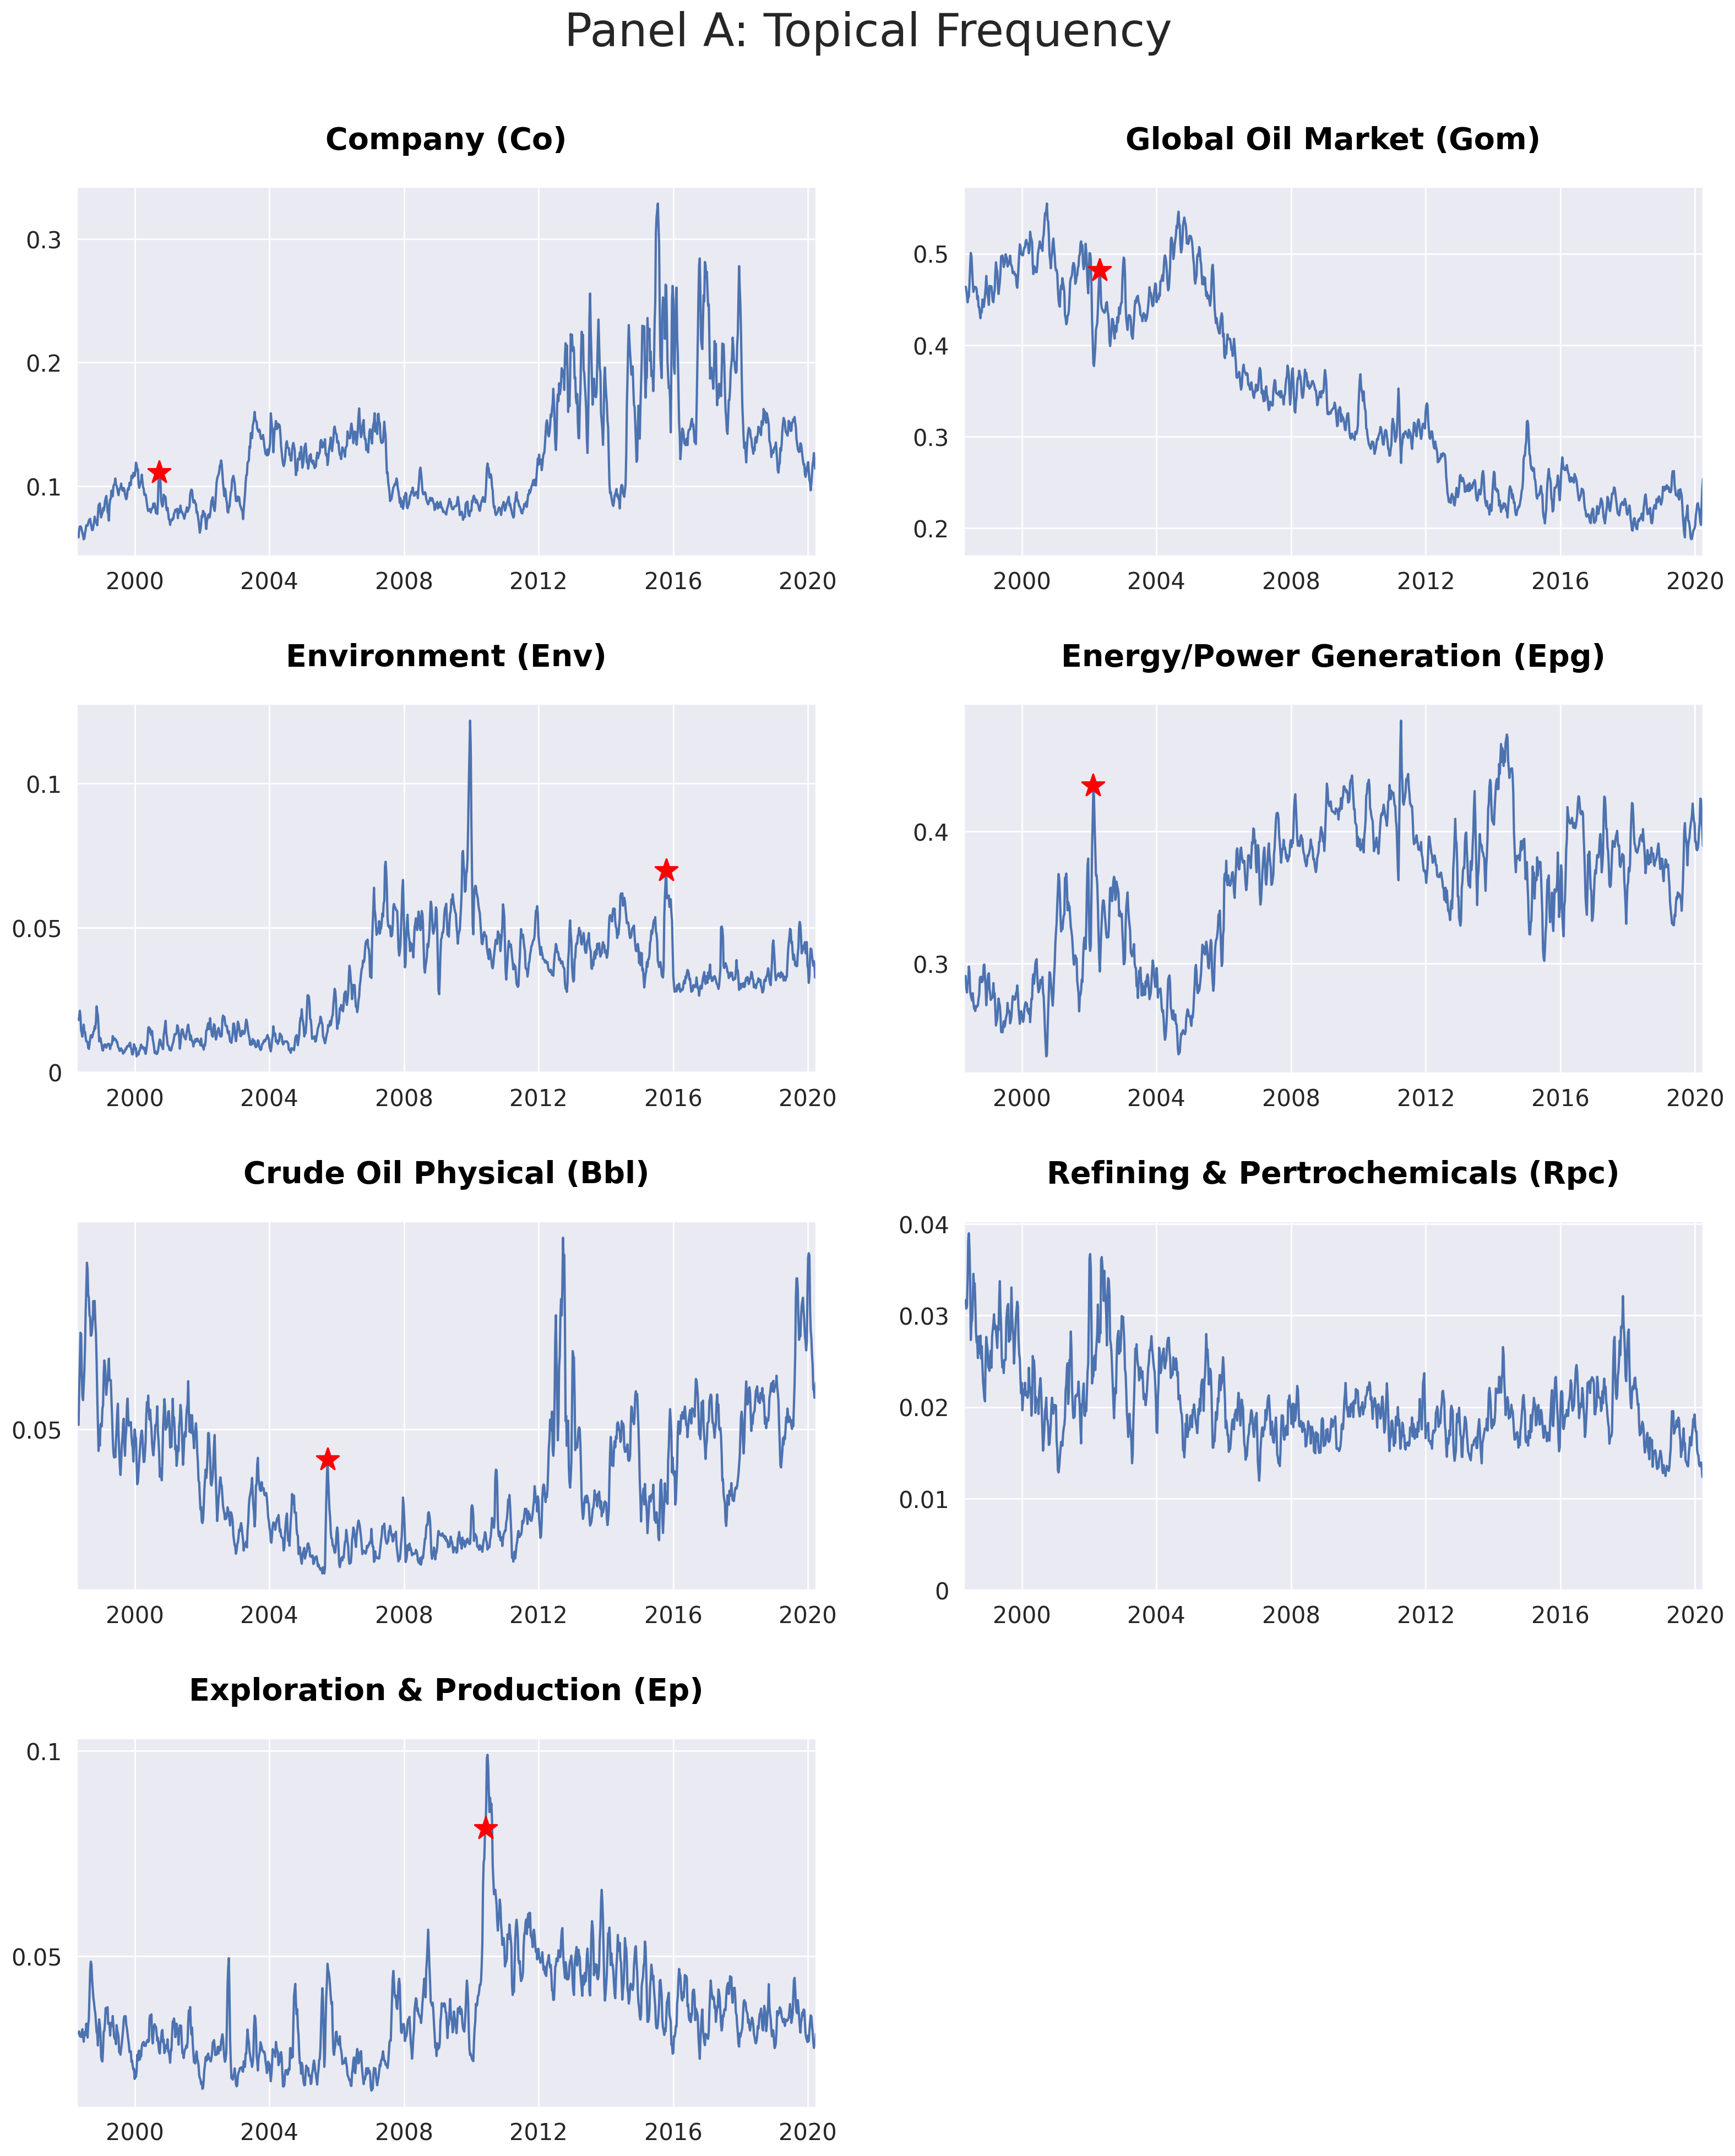

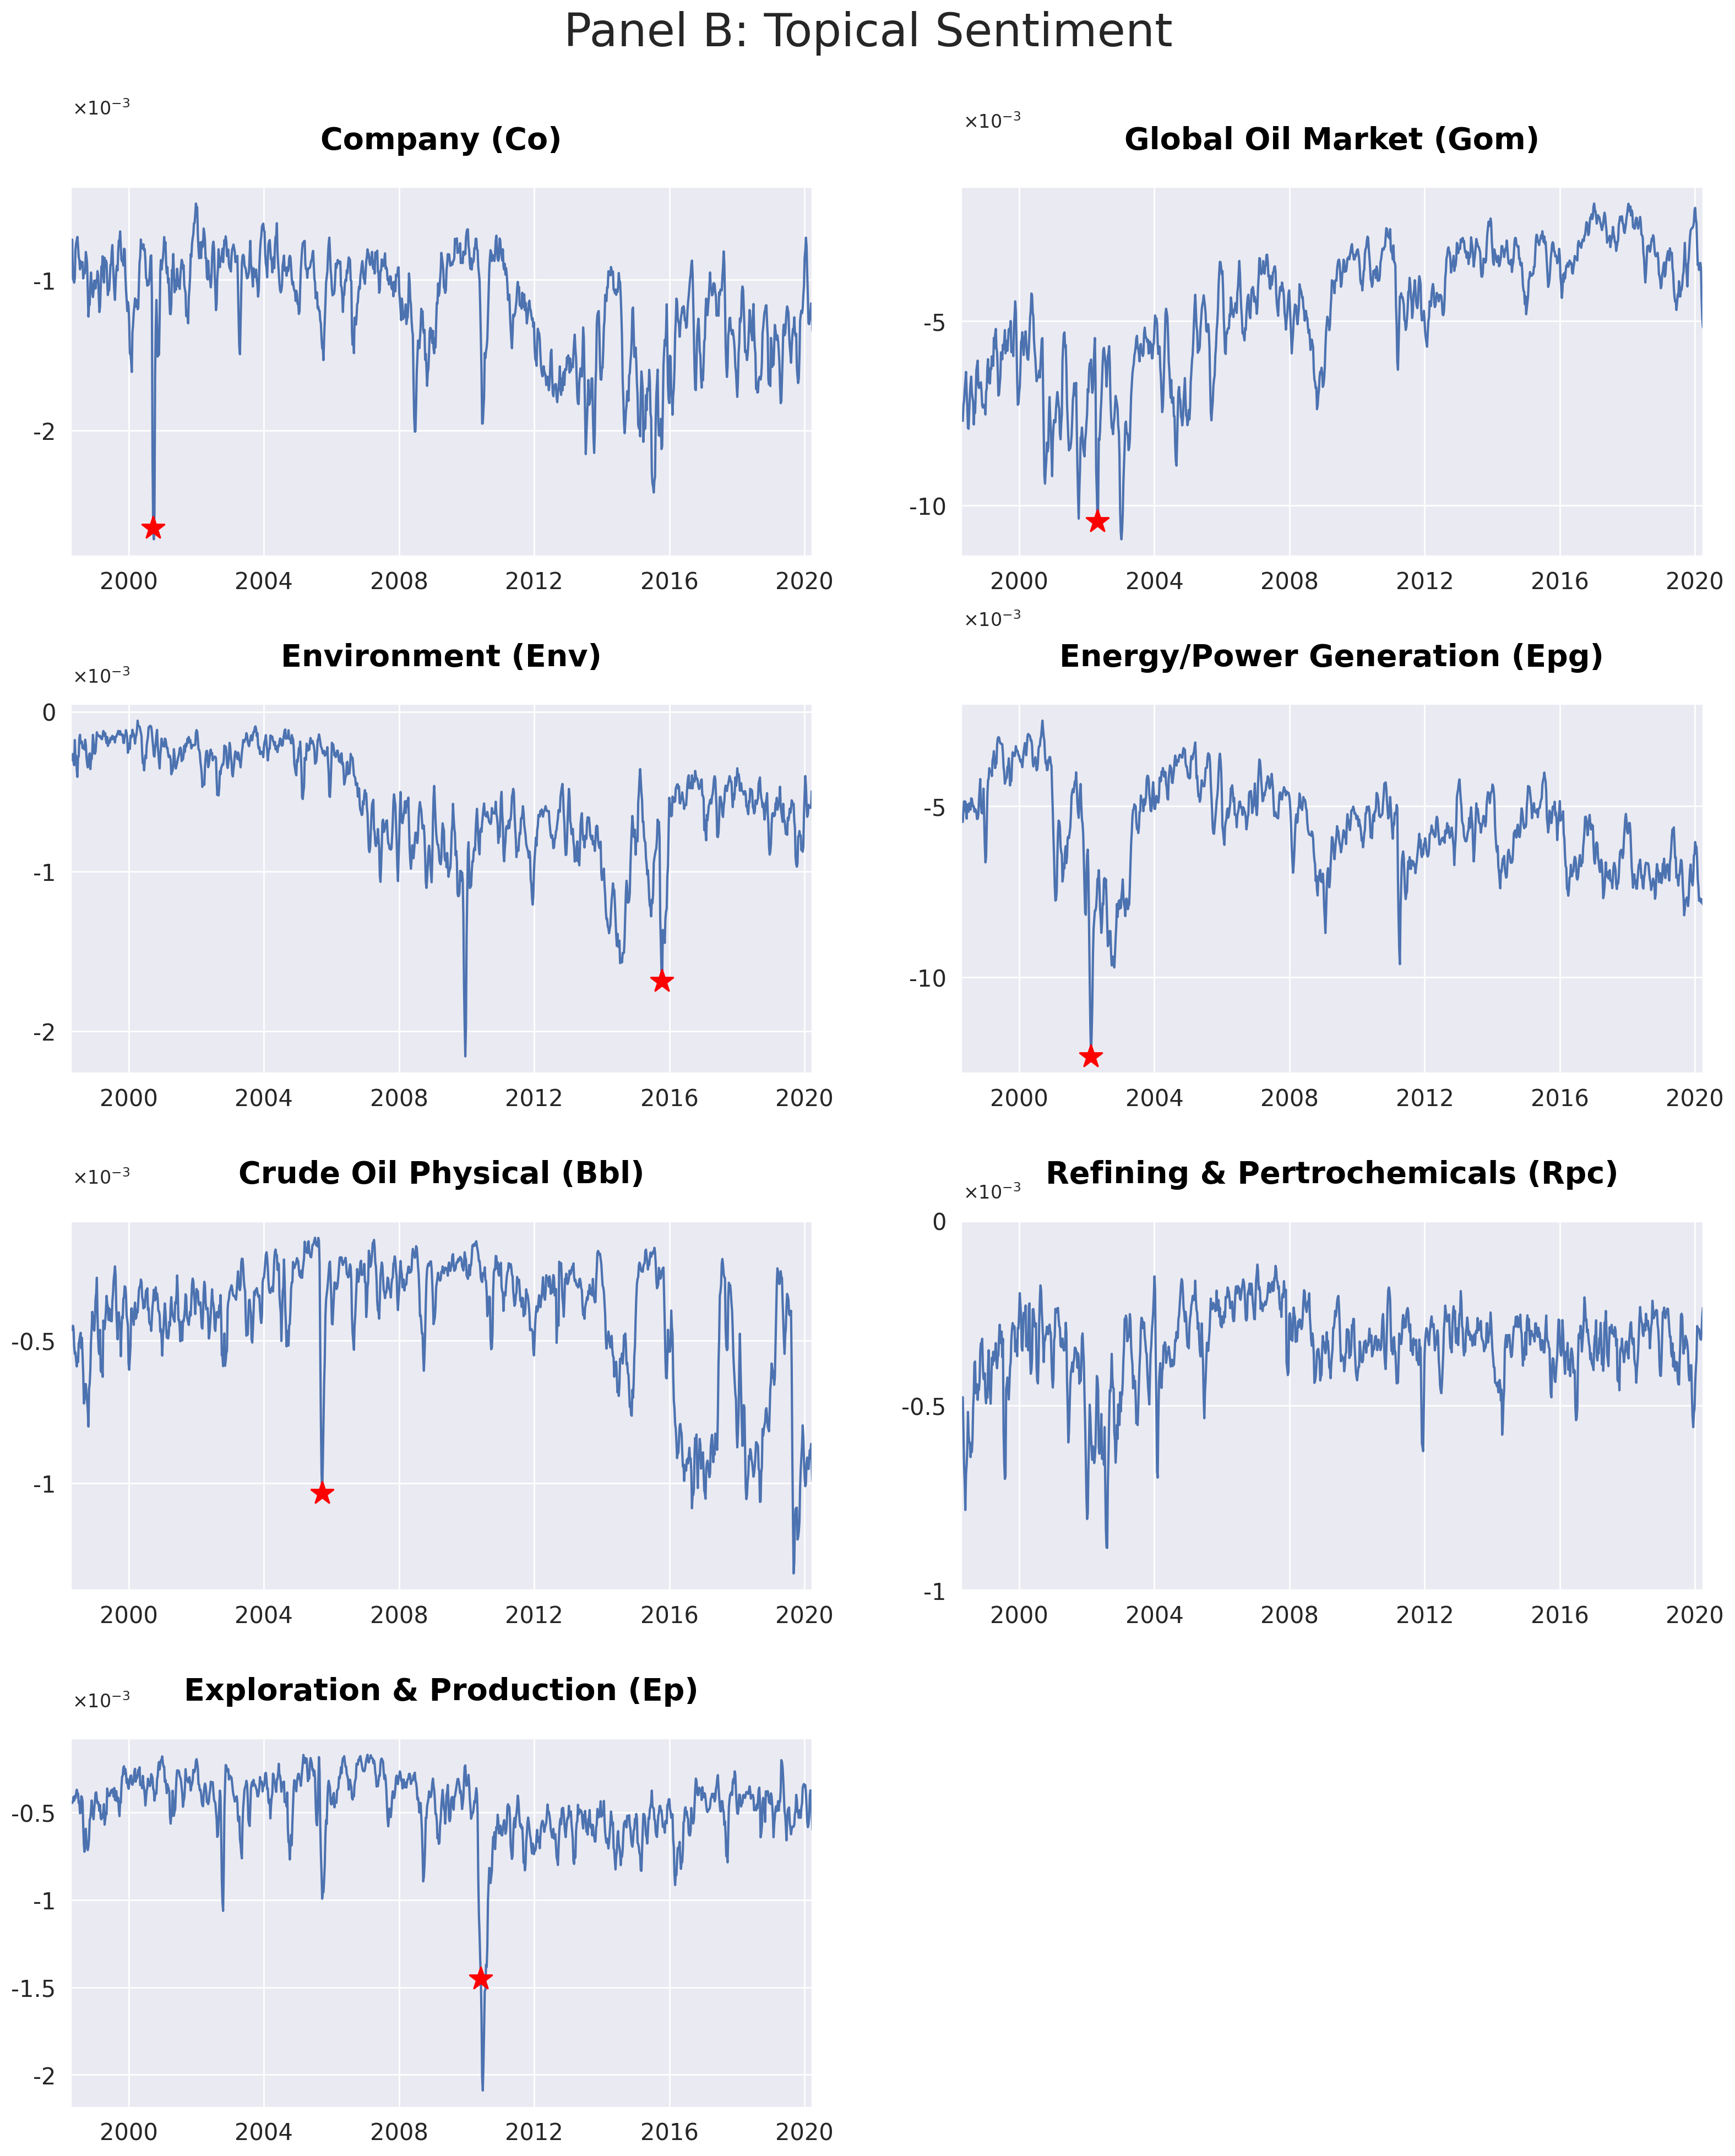

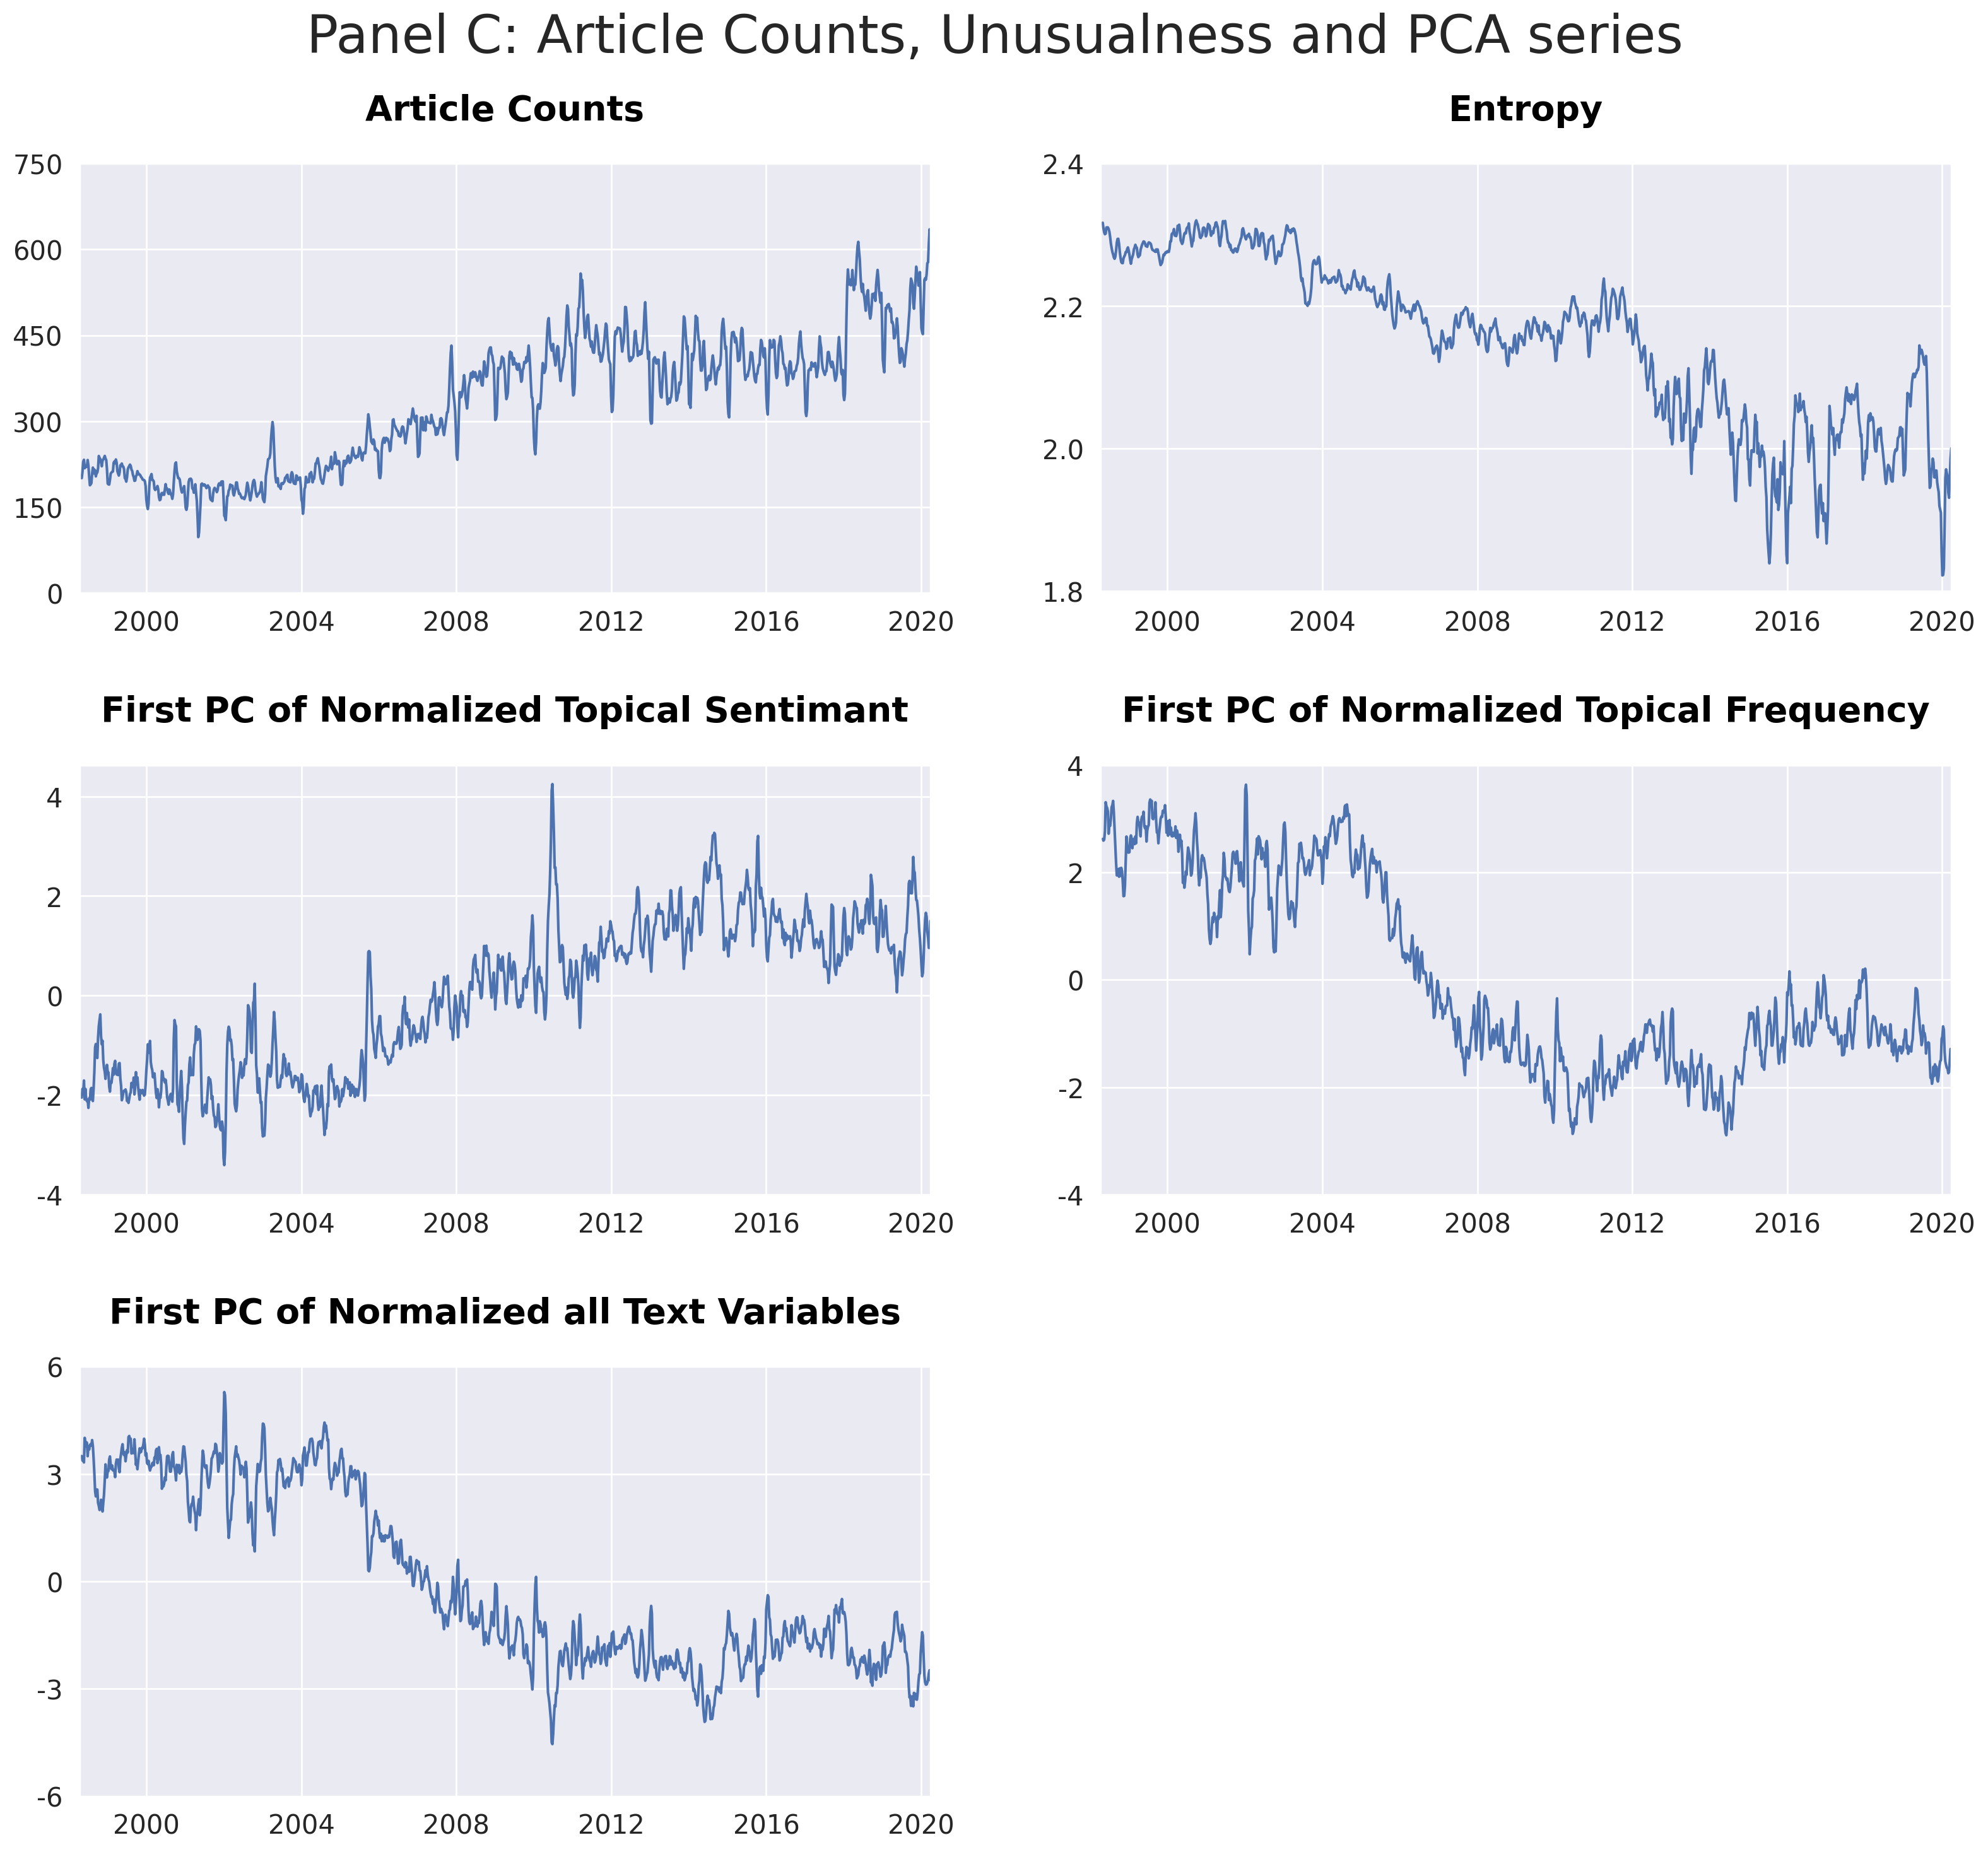

In [7]:
# read the latest dataset
dataset = pd.read_stata('transformed_data_prices_v19.dta')
date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

# remedy missing var in in-sample analysis
dataset = dataset.rename(columns={'date_Fri':'date'})
# remedy missing var in in-sample analysis
dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                 +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']

plot_freq(dataset)
plot_sent(dataset)
plot_others(dataset)

In [7]:
# mod
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
df_headlines = {}
for i, var in enumerate(var_list):
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(2).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    datesPastWeek = pd.date_range(end=twoMostNegativeChangesDate.iloc[0], periods=pastDays).to_list()\
                    +pd.date_range(end=twoMostNegativeChangesDate.iloc[1], periods=pastDays).to_list()
    datesPastWeek = [int(date.strftime('%Y%m%d')) for date in datesPastWeek]
    filtered_df = df.query(f"`date` in @datesPastWeek and `entropy` >= 2 and `total` >= 100 and `Topic{i+1}` > 0.8")
    filtered_df = filtered_df[['date', 'headline']].set_index('date')
    df_headlines[var] = filtered_df
    
for var in var_list:
    for date in set(df_headlines[var].index):
        print(topic_title_dict[var])
        print(date)
        try:
            display(df_headlines[var].loc[date,'headline'].to_list())
        except AttributeError:
            pass

Company (Co)
20000913


['EU asks Belgium for information on trucks protest',
 'Belgian truckers block entrance to Antwerp port',
 'Fuel crisis costs UK firms 250 mln stg a day -LCC',
 'UPDATE 1-UK business says fuel crisis hurting']

Company (Co)
20020410


['US stocks bounce after sell-off, Cisco boosts techs',
 'U.S. stocks hold gains, Cisco bounces after drop',
 'U.S. techs edge up, blue chips rally at midday',
 'Asia oil products trades - April 10 0100 GMT']

Global Oil Market (Gom)
20100616


['UPDATE 1-Angola set to export more crude oil in August',
 "UPDATE 1-Russia's Sistema makes Q1 profit, sales double",
 'U.S. crude stocks up 579,000 bbls in week-API',
 'NYMEX-Crude ends at 5-wk high on economic optimism',
 'UPDATE 1-U.S. crude stocks up 579,000 bbls in week-API',
 'Athabasca puts IPO, stock slump behind it - CEO',
 'Inventarios crudo en EEUU suben sorpresivamente: EIA',
 'GLOBAL MARKETS-Euro falls on Spain concerns, stocks falter',
 'INSTANT VIEW-US crude inventories rise, gasoline off-EIA',
 'US crude stocks up unexpectedly; gasoline off --EIA',
 'UPDATE 1-US crude stocks up unexpectedly; gasoline off --EIA',
 'NYMEX-Crude seesaws, choppy before EIAs on mixed data',
 'TECHNICALS-U.S. oil to rise to $78.40/bbl',
 "Non-oil activity to drive Saudi Arabia's economic growth: EFG",
 'UPDATE 1-Iraq cuts July crude supplies to term buyers']

Global Oil Market (Gom)
19990714


['Thai PTT to up retail oil prices on rising crude',
 'U.S. stocks fall, bonds ebb on Argentina worries',
 'FOCUS-Brent oil up over $19 as Saudi firm on curbs',
 'FOCUS-Reliance, at last, starts new India refinery',
 'Indonesia shipping - Tanjung Perak - July 14',
 'Romania accuses the West of unfair treatment',
 'FOCUS-Brent oil up over $19 as Saudi firm on curbs',
 'IPE oil futures retreat on wave of profit-taking',
 'Russia may raise crude export tariff to 7.5 EUR/T',
 'FOCUS-Oil speeds higher after U.S. inventories dip',
 'Oman GDP contracts by 10.2 percent in 1998-cenbank',
 'ANALYSIS-When should OPEC douse the oil rally?',
 'IPE Brent hits new 20-month high as US stocks ebb',
 'Saudi holds firm on Aug Euro crude supply cuts',
 'ANALYSIS-When should OPEC douse the oil rally?',
 'Romania accuses the West of unfair treatment (RPT)',
 'VGO makes more ground in Europe, upside room seen',
 'IPE gas oil seen $1 up, Brent 20cts up after APIs',
 'FOCUS-Oil speeds higher after U.S. invento

Environment (Env)
20100616


['INTERVIEW-Climate chief: EU must fight for green-tech jobs',
 'UN cancels Kyoto carbon scheme meetings over cash']

Environment (Env)
20100505


["Czechs sell 2 mln in CO2 rights to Japan's Mitsui",
 'UN forecasts less than 1 bln Kyoto offsets by 2012']

Energy/Power Generation (Epg)
20150325


['India telecoms airwave auction ends - TV channels',
 'U.S. Senate will vote on sanctions bill if there is no Iran deal',
 'UPDATE 1-U.S. Senate will vote on sanctions bill if there is no Iran deal',
 'Facing resistance, U.S. pushes to meet deadline for Iran deal',
 'U.S. business groups push for Export-Import Bank extension',
 'UPDATE 1-U.S. business groups push for Export-Import Bank extension',
 'U.S. business groups push for Export-Import Bank extension',
 'Australia weighs U.S., Europe-style tariffs on Chinese solar',
 'THERMAL COAL-Australian coal prices fall to pre-2008 crisis levels ',
 'China regulator open to state firms trading overseas futures',
 'Tepco expects to lose market share due to liberalisation',
 'Kansai Electric to invite foreign firms to help decommission reactors - source',
 'Mongolian court upholds $18 mln fine on SouthGobi Resources',
 'UPDATE 1-India telecoms airwave auction ends after 19 days-source',
 "India's IL&FS aims to more than triple power generati

Energy/Power Generation (Epg)
20150902


['Germany proposes changes to nuclear liability law- draft law',
 'German nuclear liability law gets green light from ministries',
 'UPDATE 1-U.S. natgas ends up after seesawing on stock builds, warm weather',
 'UPDATE 1-Magnitude 4.2 quake strikes near Grand Coulee Dam in Washington',
 'UPDATE 1-TransCanada says U.S. lets it reclassify 1.1 bcf of natgas in storage',
 'U.S. natgas slides on mixed weather; higher stockpile fears',
 'UPDATE 1-SunEdison to produce photovoltaic panels in Brazil',
 'Tesla Signature series Model X priced at $132,000 to $144,000 ',
 'Dimming Southeast Asia growth outlook adds to risks for China ',
 'China power firms return to profit as coal miners lose out',
 'PRESS DIGEST-Australian News - Sept 2',
 'BREAKINGVIEWS-India beats timely retreat from fiscal tyranny',
 'BUZZ-China insurers fall on worries stock rout may weigh on solvency ratios',
 'THERMAL COAL-Prices seesaw in global market turmoil, outlook bleak',
 'INTERVIEW-Egypt says Zohr gas find will not u

Refining & Pertrochemicals (Rpc)
20190821
Refining & Pertrochemicals (Rpc)
20190814
Exploration & Production (Ep)
20110316


In [8]:
# acc
dataset = pd.read_stata('transformed_data_prices_v19.2_acc.dta')
df_headlines = {}
for i, var in enumerate(var_list):
    twoMostNegativeChangesIndex = dataset[f's{var}_Fri'].diff().nsmallest(2).index
    twoMostNegativeChangesDate = dataset['date_Wed'][twoMostNegativeChangesIndex]
    datesPastWeek = pd.date_range(end=twoMostNegativeChangesDate.iloc[0], periods=pastDays).to_list()\
                    +pd.date_range(end=twoMostNegativeChangesDate.iloc[1], periods=pastDays).to_list()
    datesPastWeek = [int(date.strftime('%Y%m%d')) for date in datesPastWeek]
    filtered_df = df.query(f"`date` in @datesPastWeek and `entropy` >= 2 and `total` >= 100 and `Topic{i+1}` > 0.8")
    filtered_df = filtered_df[['date', 'headline']].set_index('date')
    df_headlines[var] = filtered_df
    
for var in var_list:
    for date in set(df_headlines[var].index):
        print(topic_title_dict[var])
        print(date)
        try:
            display(df_headlines[var].loc[date,'headline'].to_list())
        except AttributeError:
            pass

Company (Co)
20000920


['Worries over fuel supply delay UK sugar processing',
 'UPDATE 1-Top Blair ally says Labour will bounce back',
 'Brazil govt to hold alcohol stock auction Sept 22']

Company (Co)
20000913


['EU asks Belgium for information on trucks protest',
 'Belgian truckers block entrance to Antwerp port',
 'Fuel crisis costs UK firms 250 mln stg a day -LCC',
 'UPDATE 1-UK business says fuel crisis hurting']

Global Oil Market (Gom)
20021225


["Vietnam's 2002 exports to rise 9.8 pct y/y-report",
 "UPDATE 1-Russia quits Vietnam's $1.3 bln oil refinery",
 'Algeria is out of economic crisis - minister',
 'Strike shortages dull Christmas spirit in Venezuela',
 'U.S. oil stocks show shock build despite Venezuela',
 'Strike-hit Venezuelans mix Christmas with politics',
 'Japan AOC says to sign Kuwait oil deal on Dec 29',
 'Asia Crude-Gulf steady in listless Christmas market']

Global Oil Market (Gom)
20020410


['WRAPUP 1-US stocks dip on profit worries, bonds up',
 'INTERVIEW-U.S. says Angola must come clean on oil revenues',
 'IPE Brent plunges as tension eases, profit-taking',
 'Powell plays down possible impact of Iraq oil move',
 'IPE Brent opens lower after U.S. stockpile climb',
 'Norwegian shipper buys 13 bulk vessels from Moeller',
 'Swedish CPI may support new rate rise expectations',
 'OVERNIGHT-IPE Brent plunges as tension eases, profit-taking',
 'OVERNIGHT-WRAPUP 1-US stocks dip on profit worries, bonds up',
 'IPE Brent crude steady in light short-covering',
 'Global oil demand growth to resume in Q2-IEA',
 "France's Fabius seeks stable oil as key to global recovery",
 'UPDATE 1-IEA sees demand growth resuming, supply risk',
 'NWE fuel oil barges dip, gas oil steady early',
 'IPE Brent retraces early losses in quiet trade',
 "UPDATE 1-U.S.'s O'Neill hopeful on oil, economy, steel",
 'Norway to consider ending oil cuts due to prices',
 'Dtd Brent crude walloped, but May play looms

Environment (Env)
20100616


['INTERVIEW-Climate chief: EU must fight for green-tech jobs',
 'UN cancels Kyoto carbon scheme meetings over cash']

Environment (Env)
20100505


["Czechs sell 2 mln in CO2 rights to Japan's Mitsui",
 'UN forecasts less than 1 bln Kyoto offsets by 2012']

Energy/Power Generation (Epg)
20020828


['RPT-INTERVIEW-EU bashing will stop under Stoiber, top aidesays',
 'UK business representatives eye new SEC rules',
 "UPDATE 1-Germany's Stoiber shifts Iraq stance before poll",
 'German conservatives change Iraq stance before poll',
 'UPDATE 1-Khatami warns U.S. against attacking Iran',
 'INTERVIEW-Industrial users to appeal French power grid tariff',
 'UPDATE 1-Dynegy overhauls position of CFO in latest shakeup',
 'Pa. official warns of local pension plan risks',
 'Calif cuts cost of 10-year power deal by $215 mln',
 'Enron assets sales could mean end of company -sources',
 'Colombian unions threaten strike over benefit cuts',
 'Chile destroys own land mines near Peru border',
 'Dynegy overhauls position of CFO in latest shakeup',
 'Pinnacle West unit to seek ruling reconsideration',
 'FERC sets Oct. meeting on RTO market trading rules',
 'Calif, power firms have until Thurs to settle-judge',
 'NGC <NCH.NZ> makes deal with Shell over Maui gas',
 'China puts state assets up for globa

Energy/Power Generation (Epg)
20001213


['PRESS DIGEST - Vietnam - Dec 13',
 "Yugoslavia pledges 'no more war' at donors meeting",
 'Europe green energy certificates start test trading',
 "UPDATE 1-HEW/Vattenfall win race for Germany's Veag",
 'Ruhrgas takes stake in Remscheid utility',
 'UK Innogy to start trading gas at Zeebrugge hub',
 'Dutch forward power creeps up, APX day-aheads rise',
 "UPDATE 1-Centrica's<CNA.L> Goldfish leaps on to bank wagon",
 'Calif. needs short-term remedies to fix power market',
 'ANALYSIS-U.S. natgas prices retreat after record run',
 'Workers in bias suit seek Southern Co. papers',
 'Arkansas Public Service Commission rules against merger',
 "High U.S. natural gas prices boost LNG's prospects",
 'ISO New England worries about power supplies Wed. night',
 'Icestorm glazes Texas roads, runways',
 'UtiliCorp says plans IPO for its Aquila unit',
 'UPDATE 1-UtiliCorp says plans IPO for Aquila unit',
 'Israel speaker wants Spain to release Gusinsky-WJC',
 'TXU says 100,000 customers without power a

Crude Oil Physical (Bbl)
20020123
Refining & Pertrochemicals (Rpc)
20091202


["TAKE A LOOK-Fritz Henderson out as GM's CEO",
 "TAKE A LOOK-Fritz Henderson out as GM's CEO"]

Refining & Pertrochemicals (Rpc)
20150923


['Myanmar inaugurates $1.5 billion economic zone ahead of elections',
 "UPDATE 1-Taiwan's Formosa Petrochemical makes rare offer of heavy naphtha cargo - traders"]

Exploration & Production (Ep)
20190821
Exploration & Production (Ep)
20190814


['EUROPE RESEARCH ROUNDUP-Boohoo Group, New Work SE, Zurich Insurance Group   ',
 'INTERVIEW-Southern Yemeni separatists tell Saudi Arabia: evict Islah or lose the war  ',
 'UPDATE 1-Southern Yemeni separatists tell Saudi Arabia: evict Islah or lose the war']

# new topic model (mod)

- construct Table III
- document and clean github (put codes into __archive__)

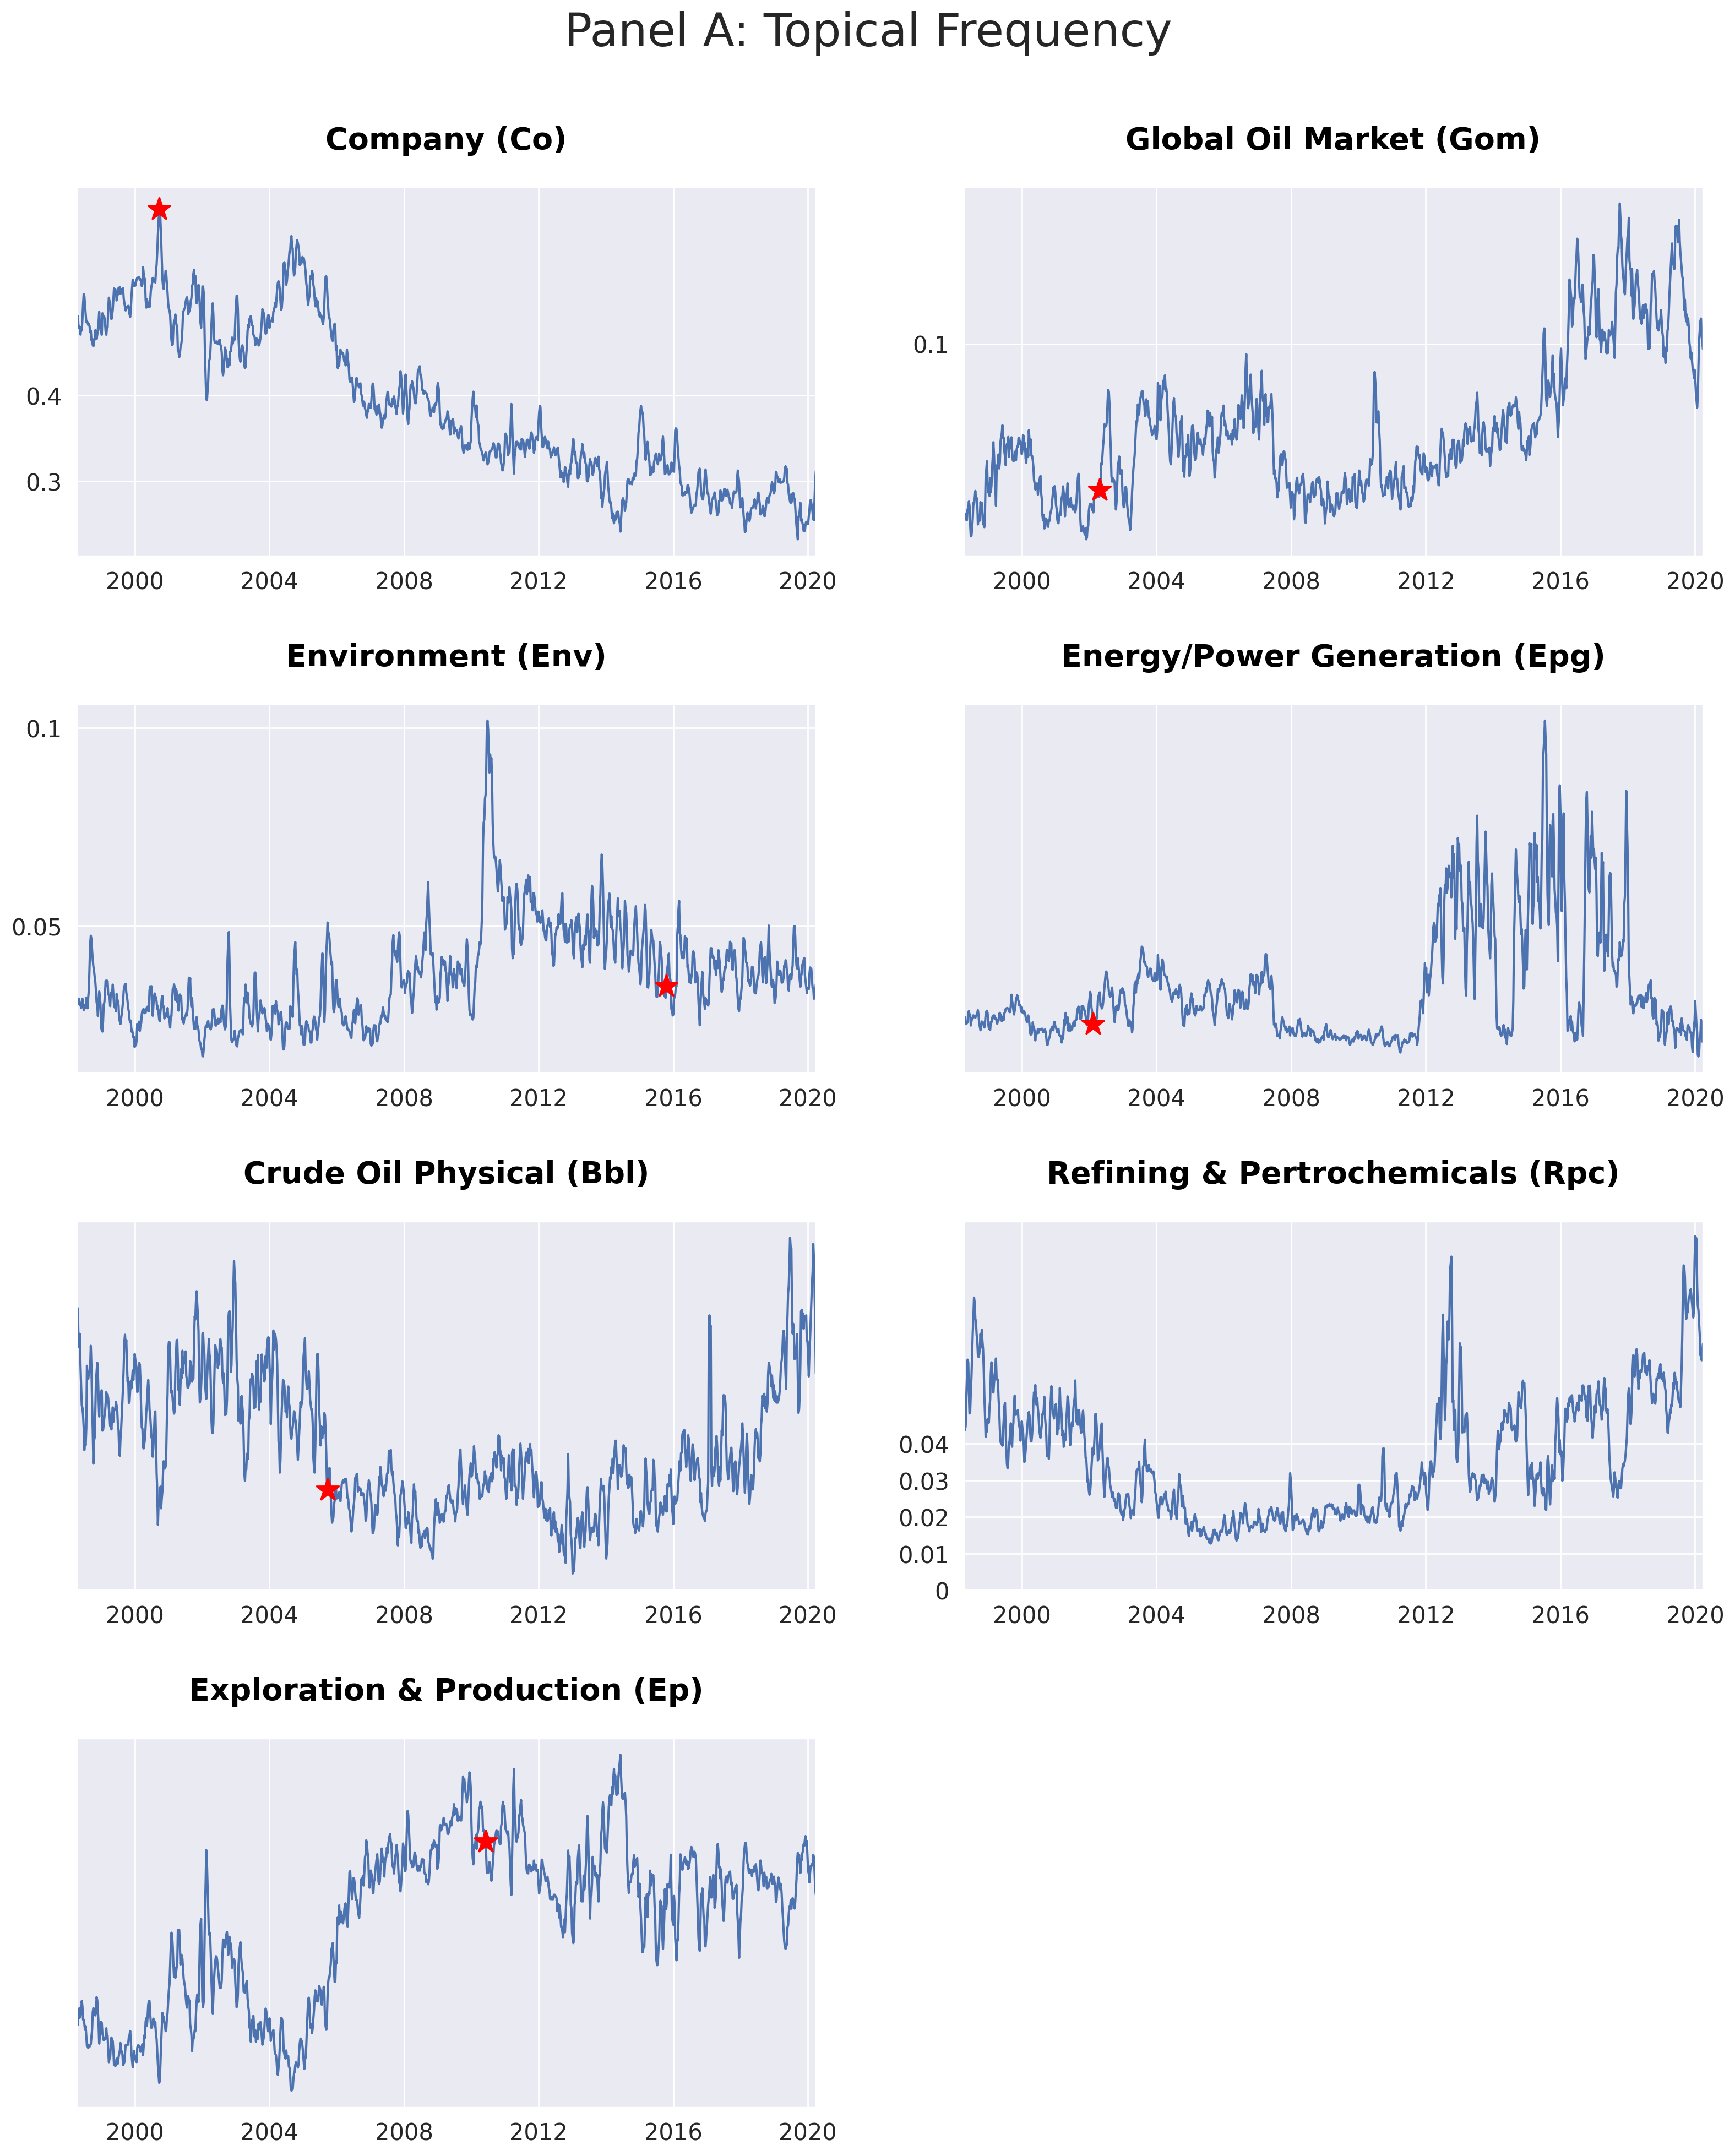

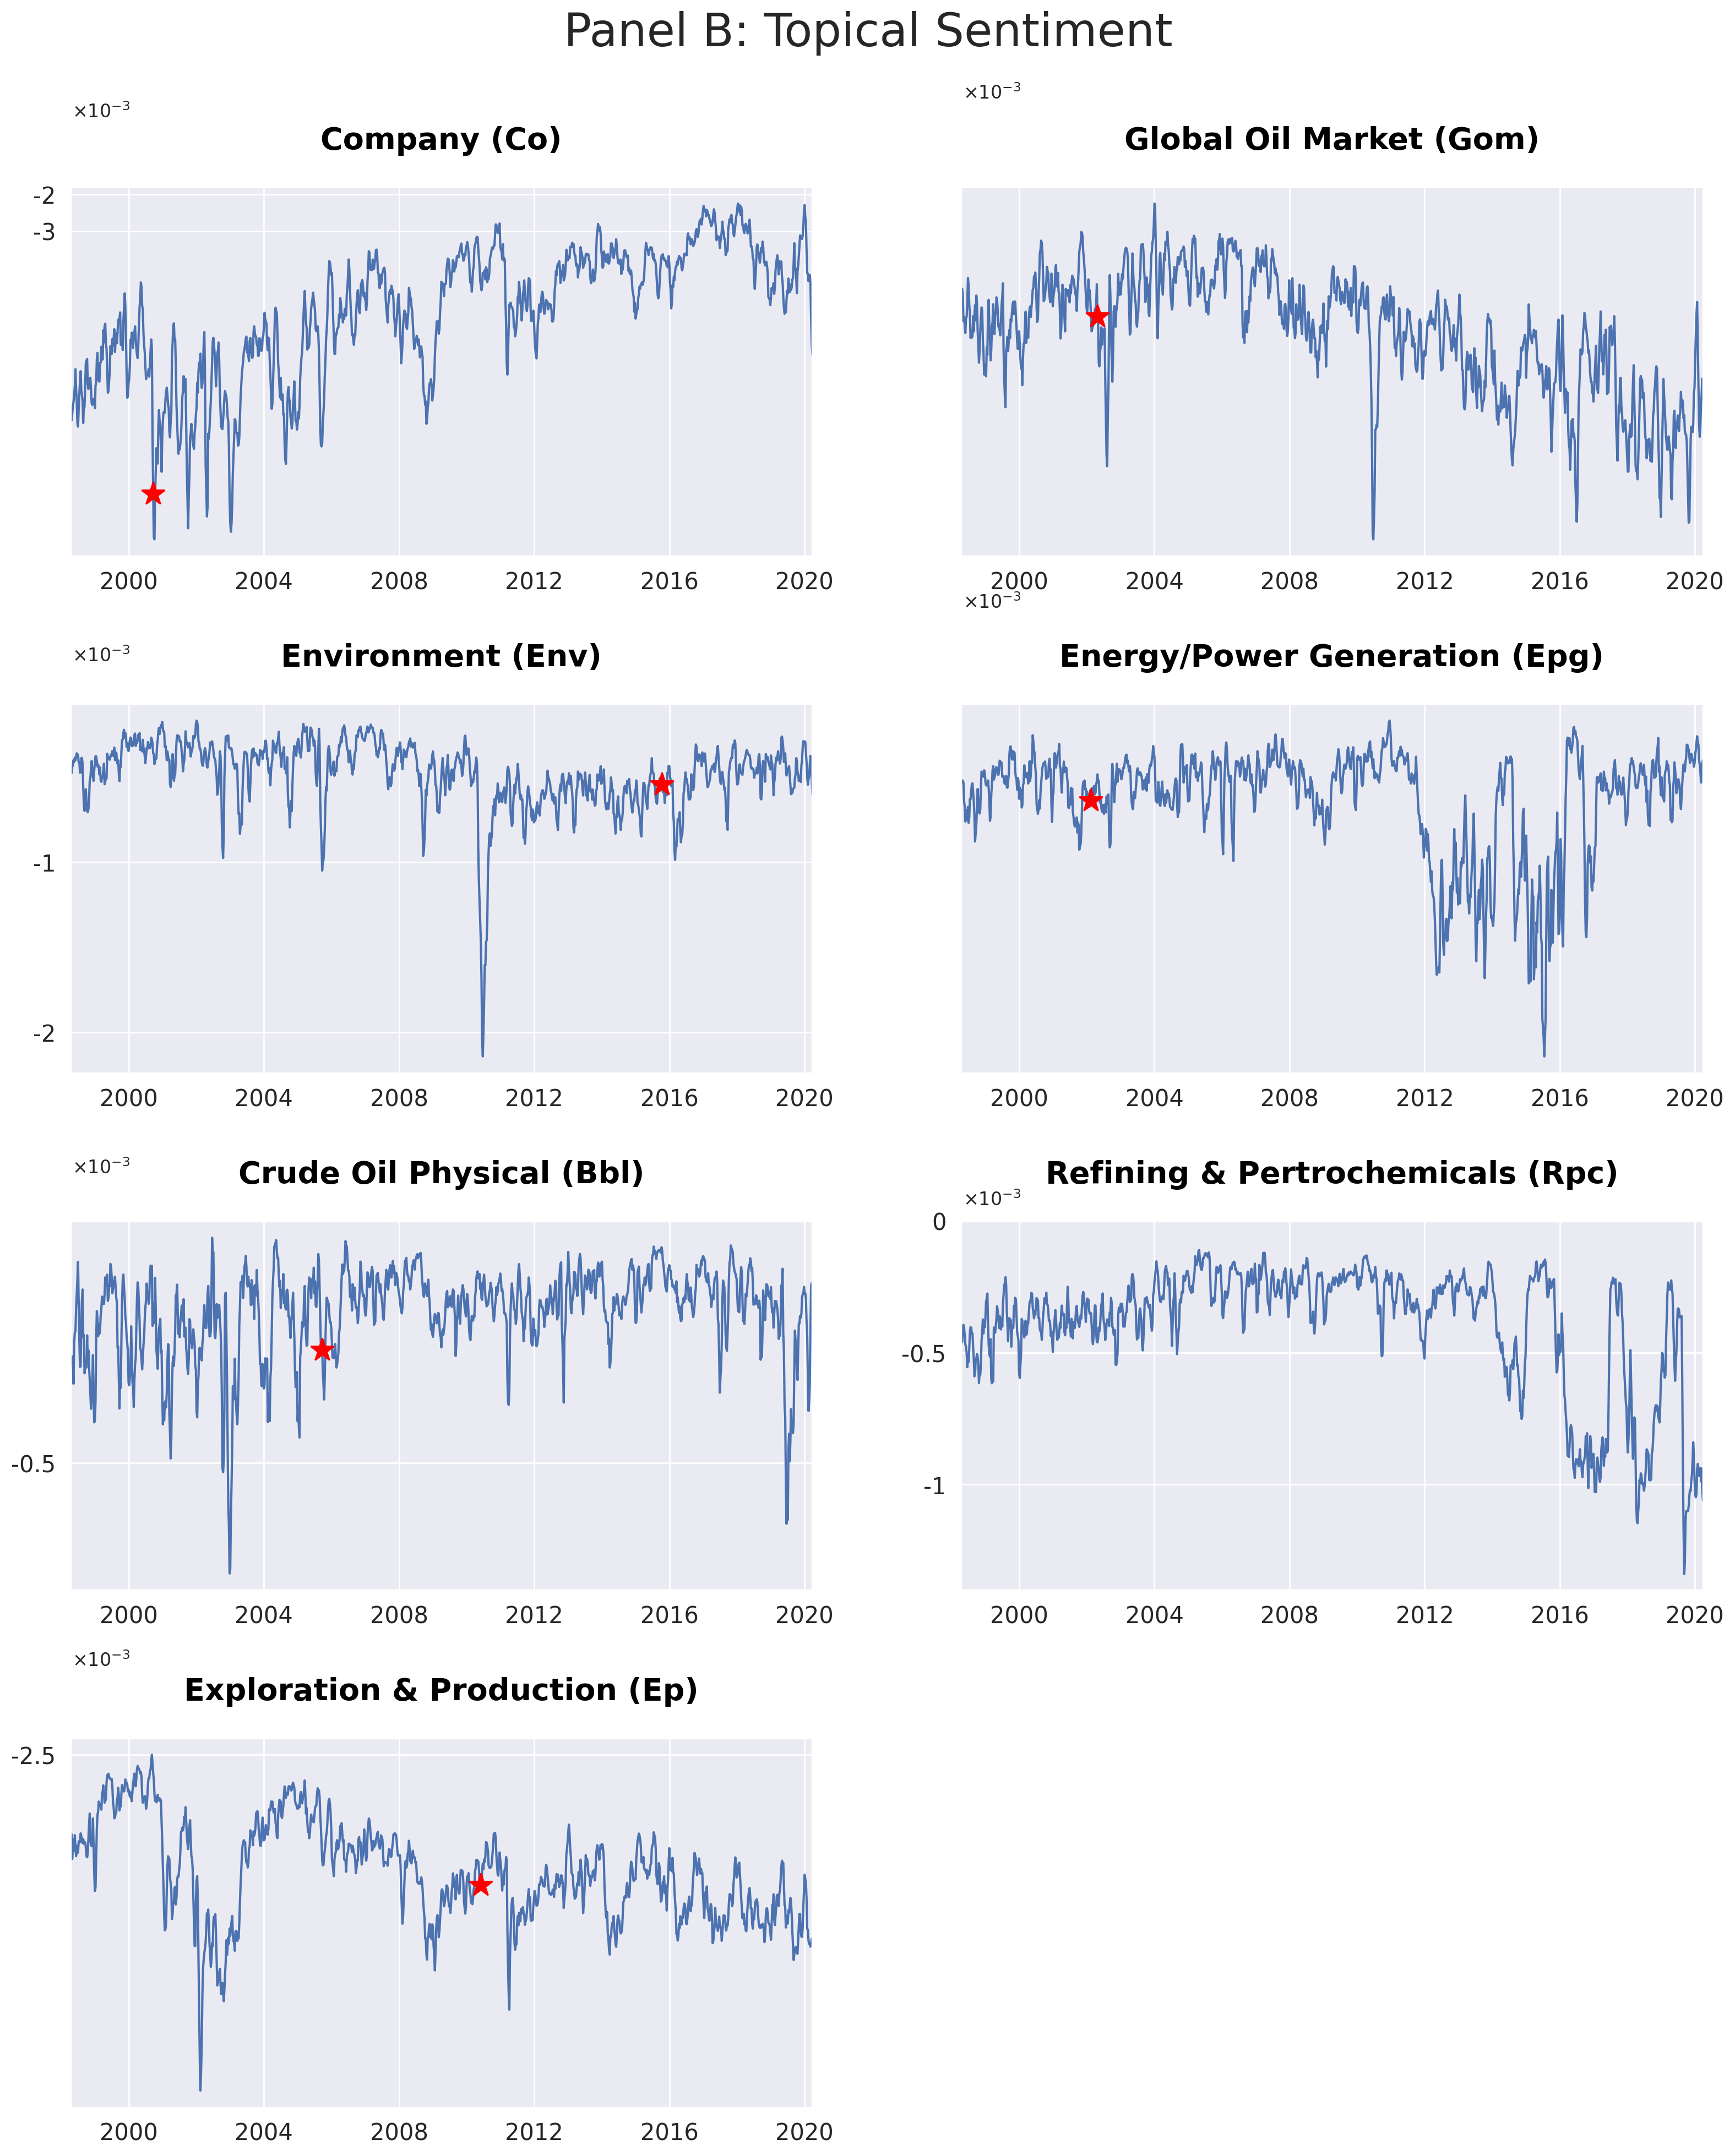

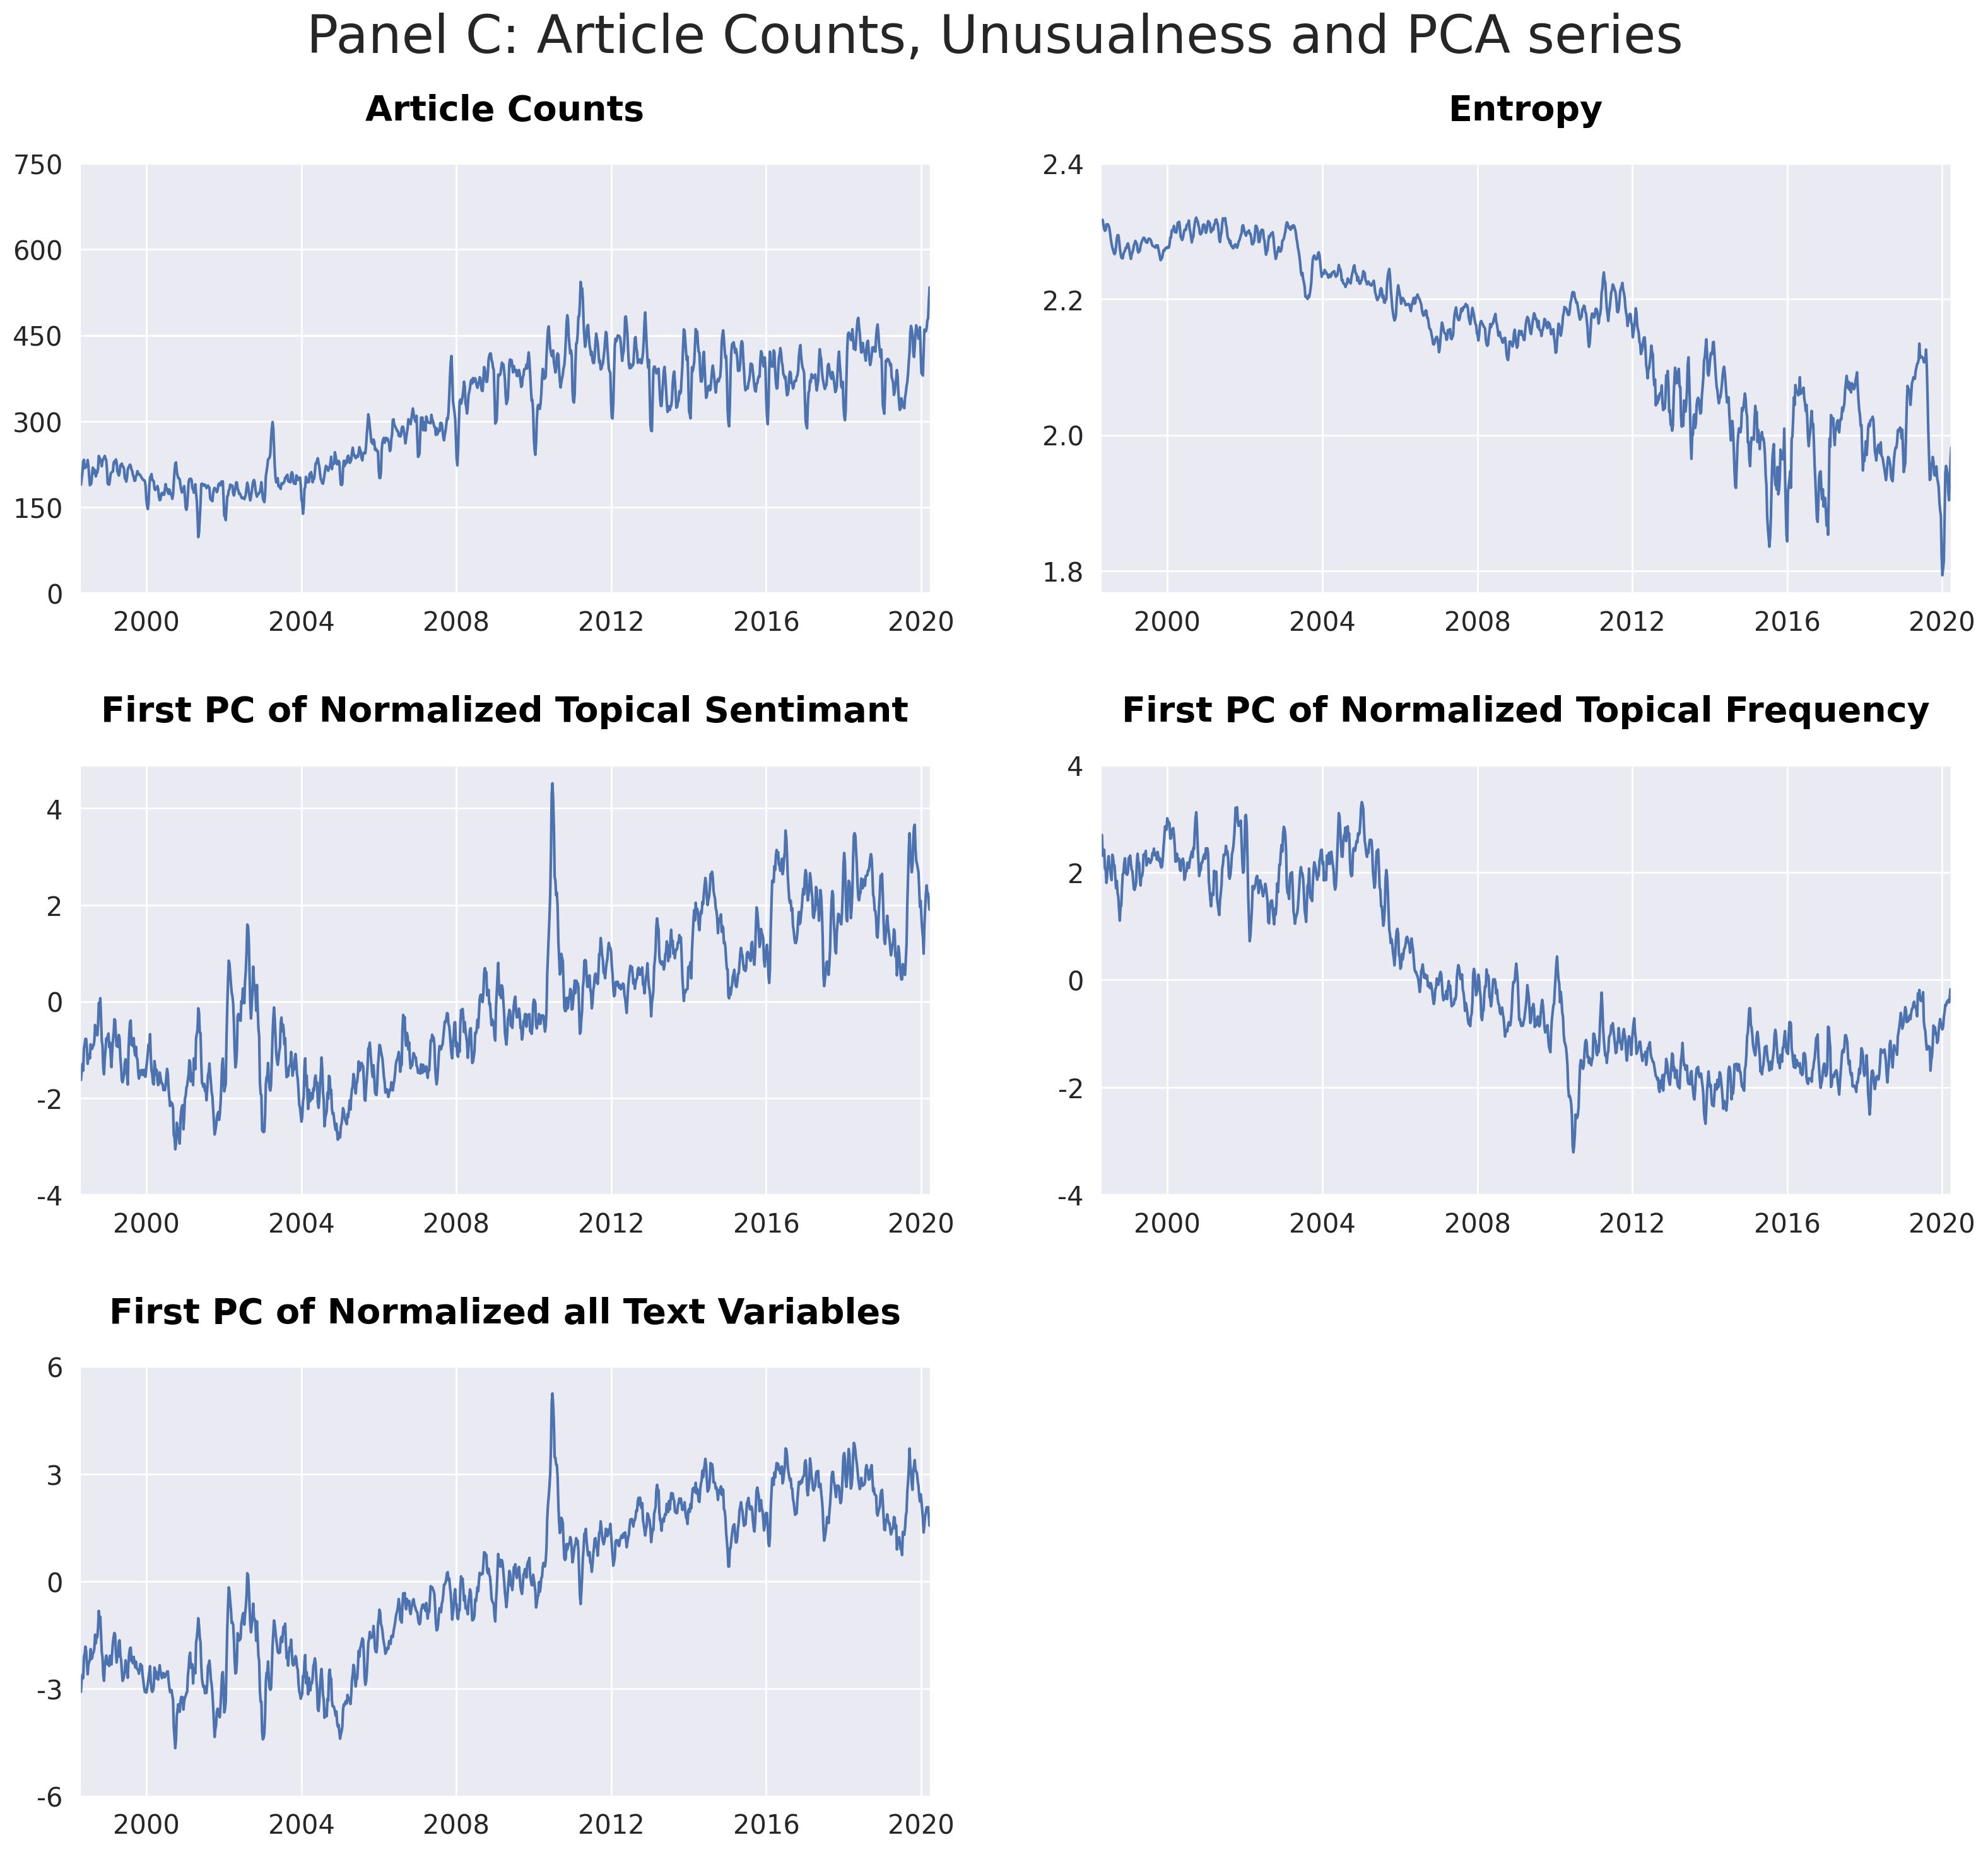

In [2]:
# read the latest dataset
dataset = pd.read_stata('transformed_data_prices_v19.2_mod.dta')
date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

# remedy missing var in in-sample analysis
dataset = dataset.rename(columns={'date_Fri':'date'})
# remedy missing var in in-sample analysis
dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                 +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']

plot_freq(dataset)
plot_sent(dataset)
plot_others(dataset)

# new topic model (acc)

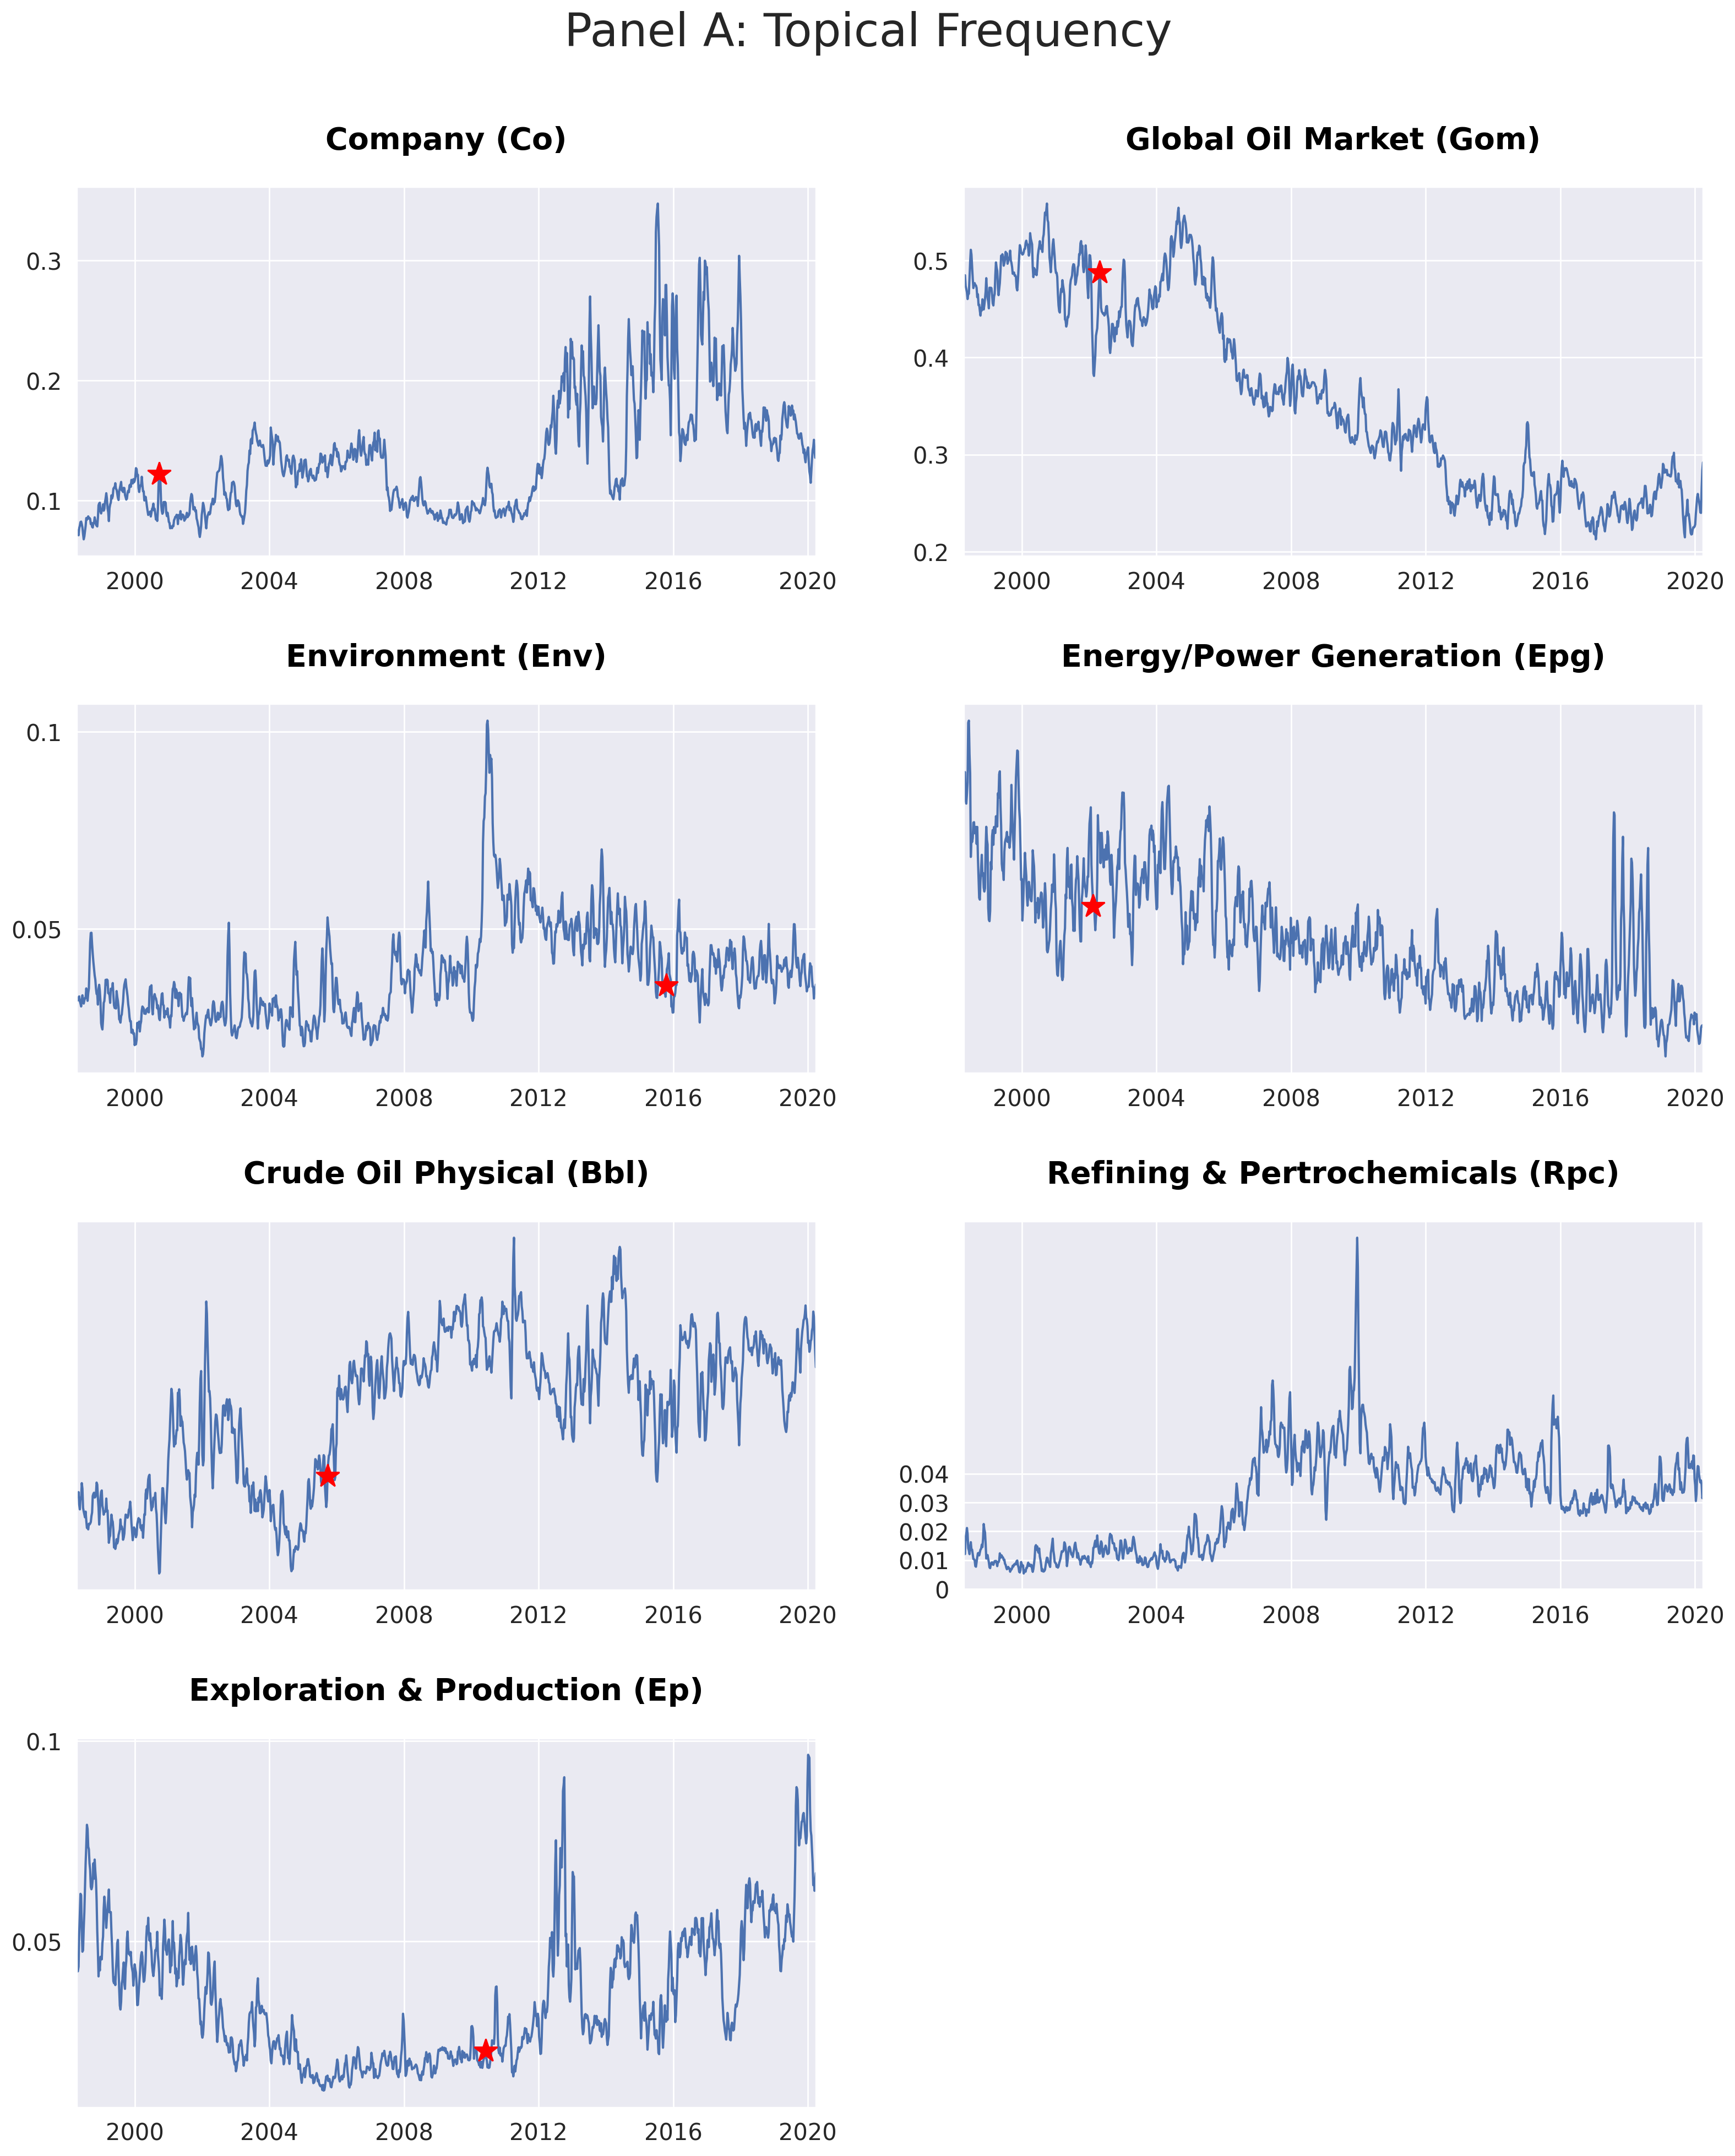

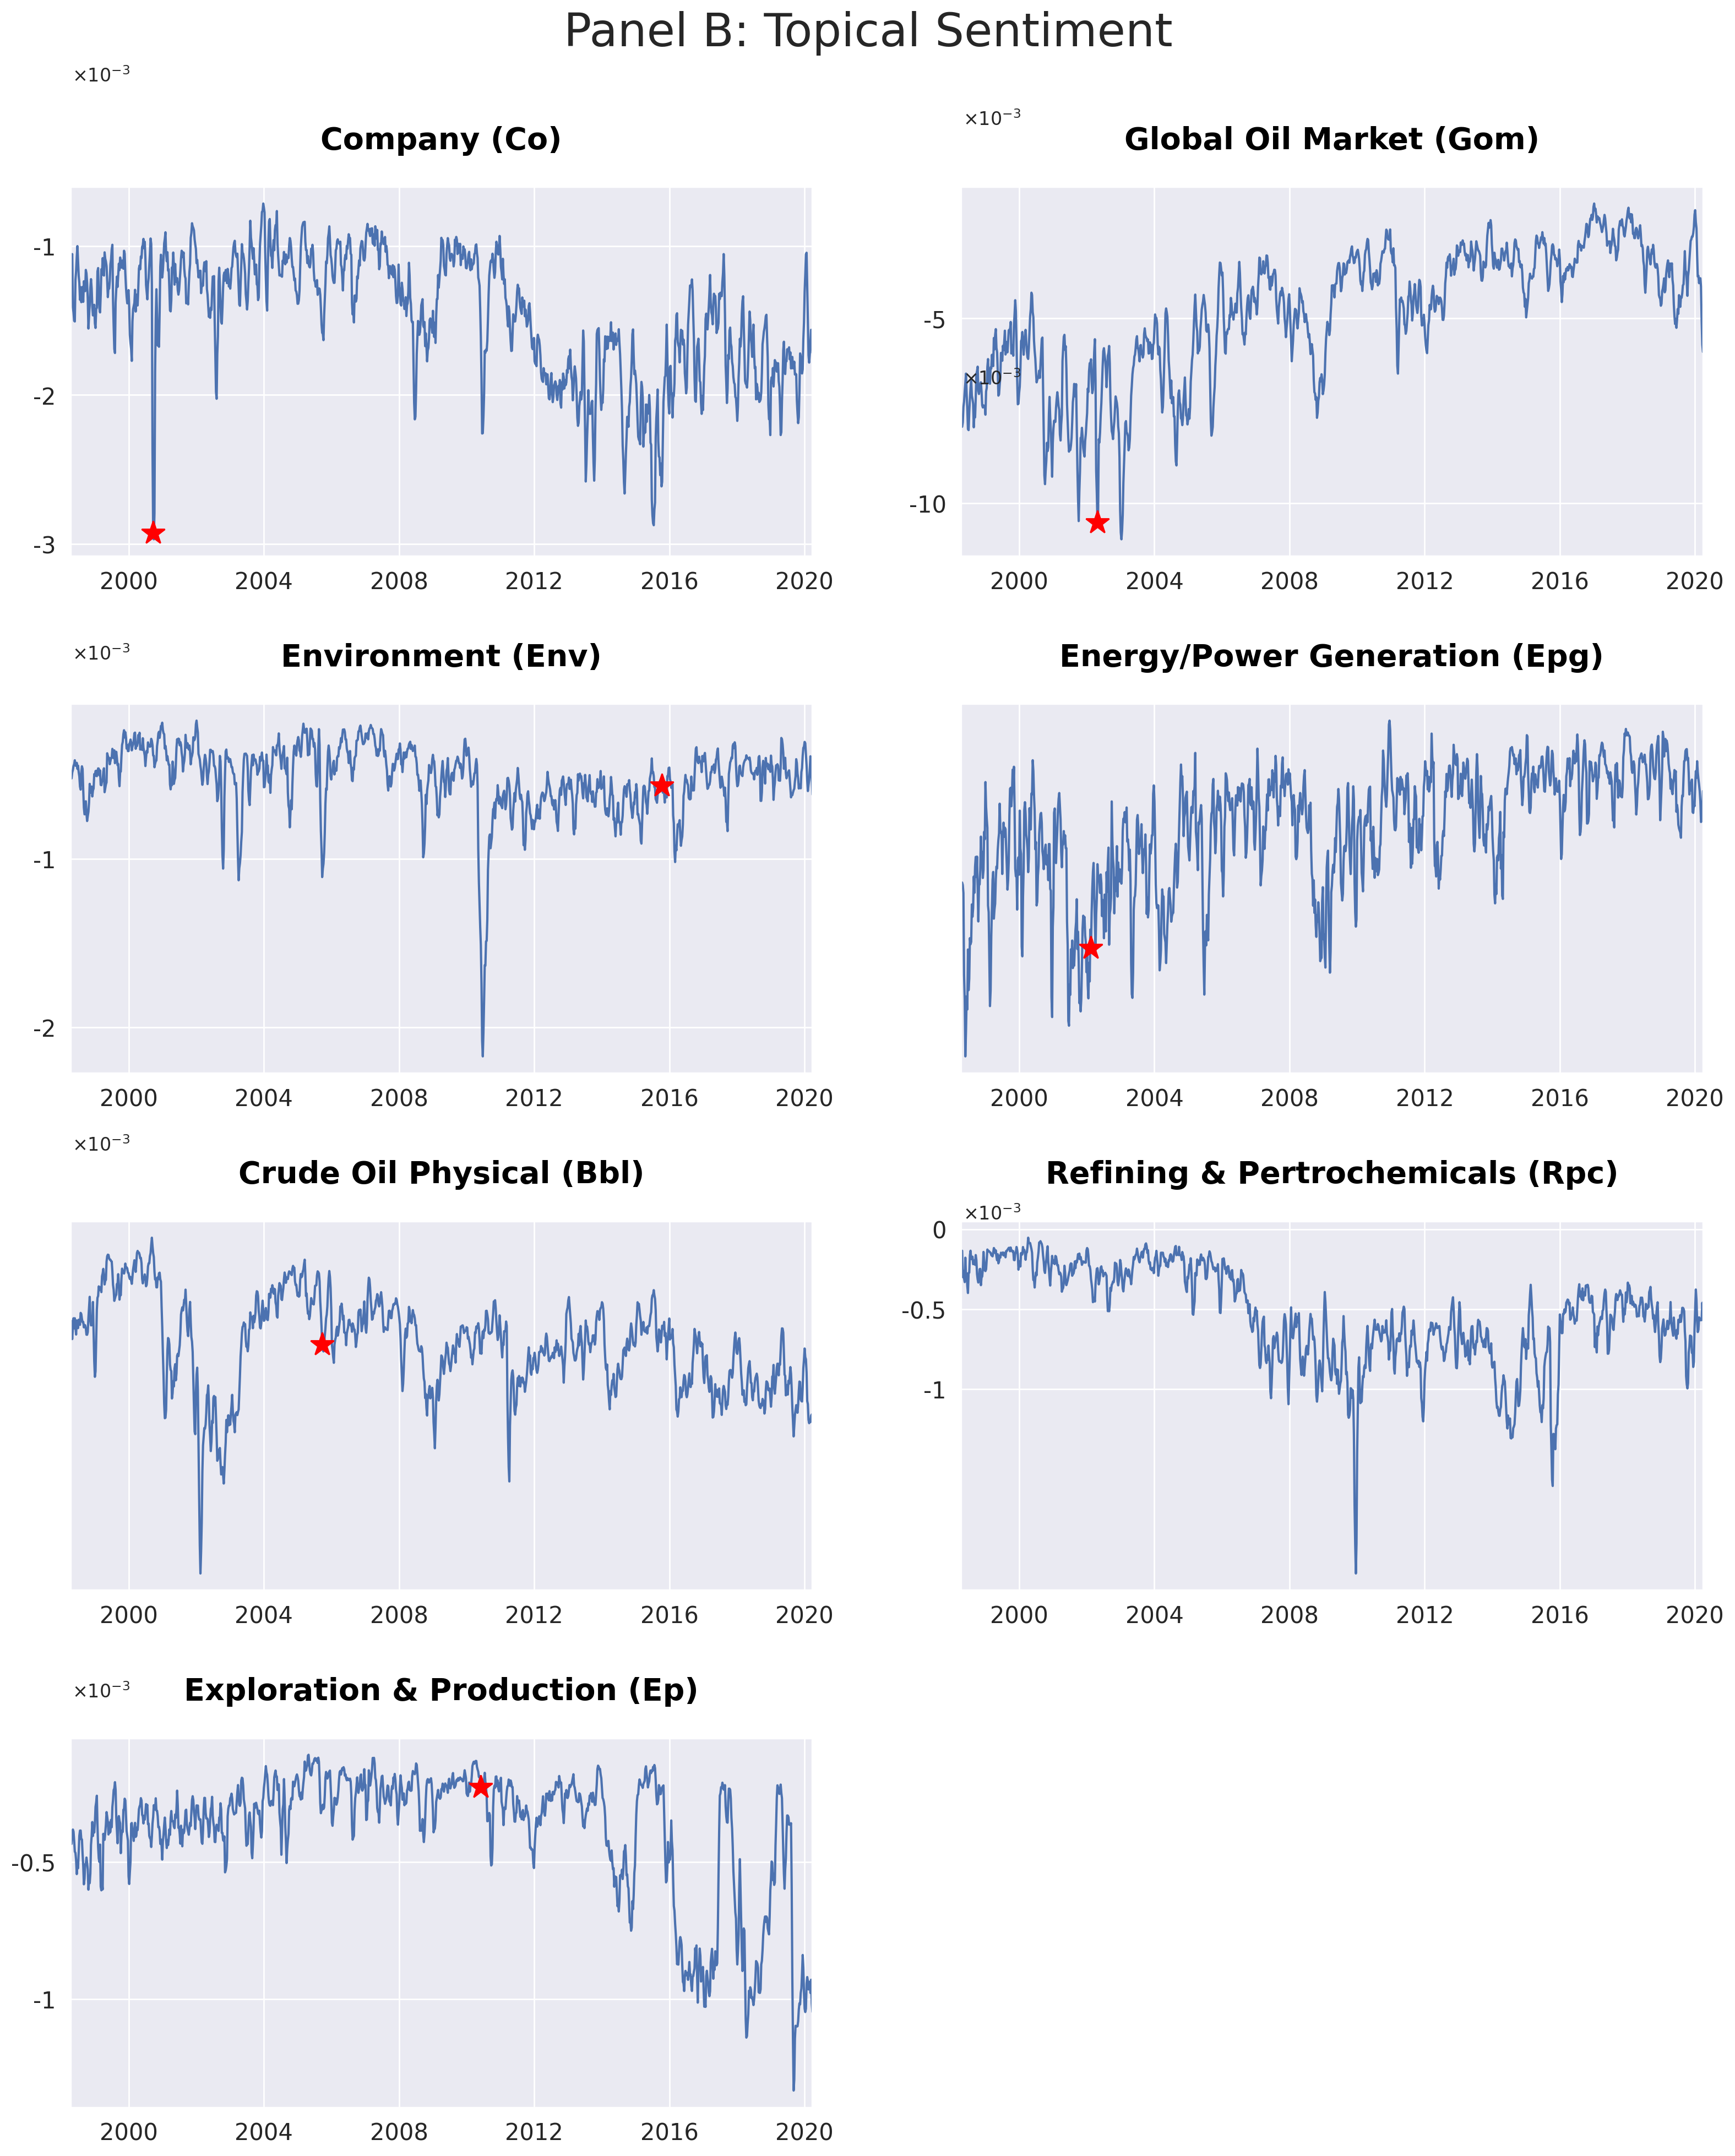

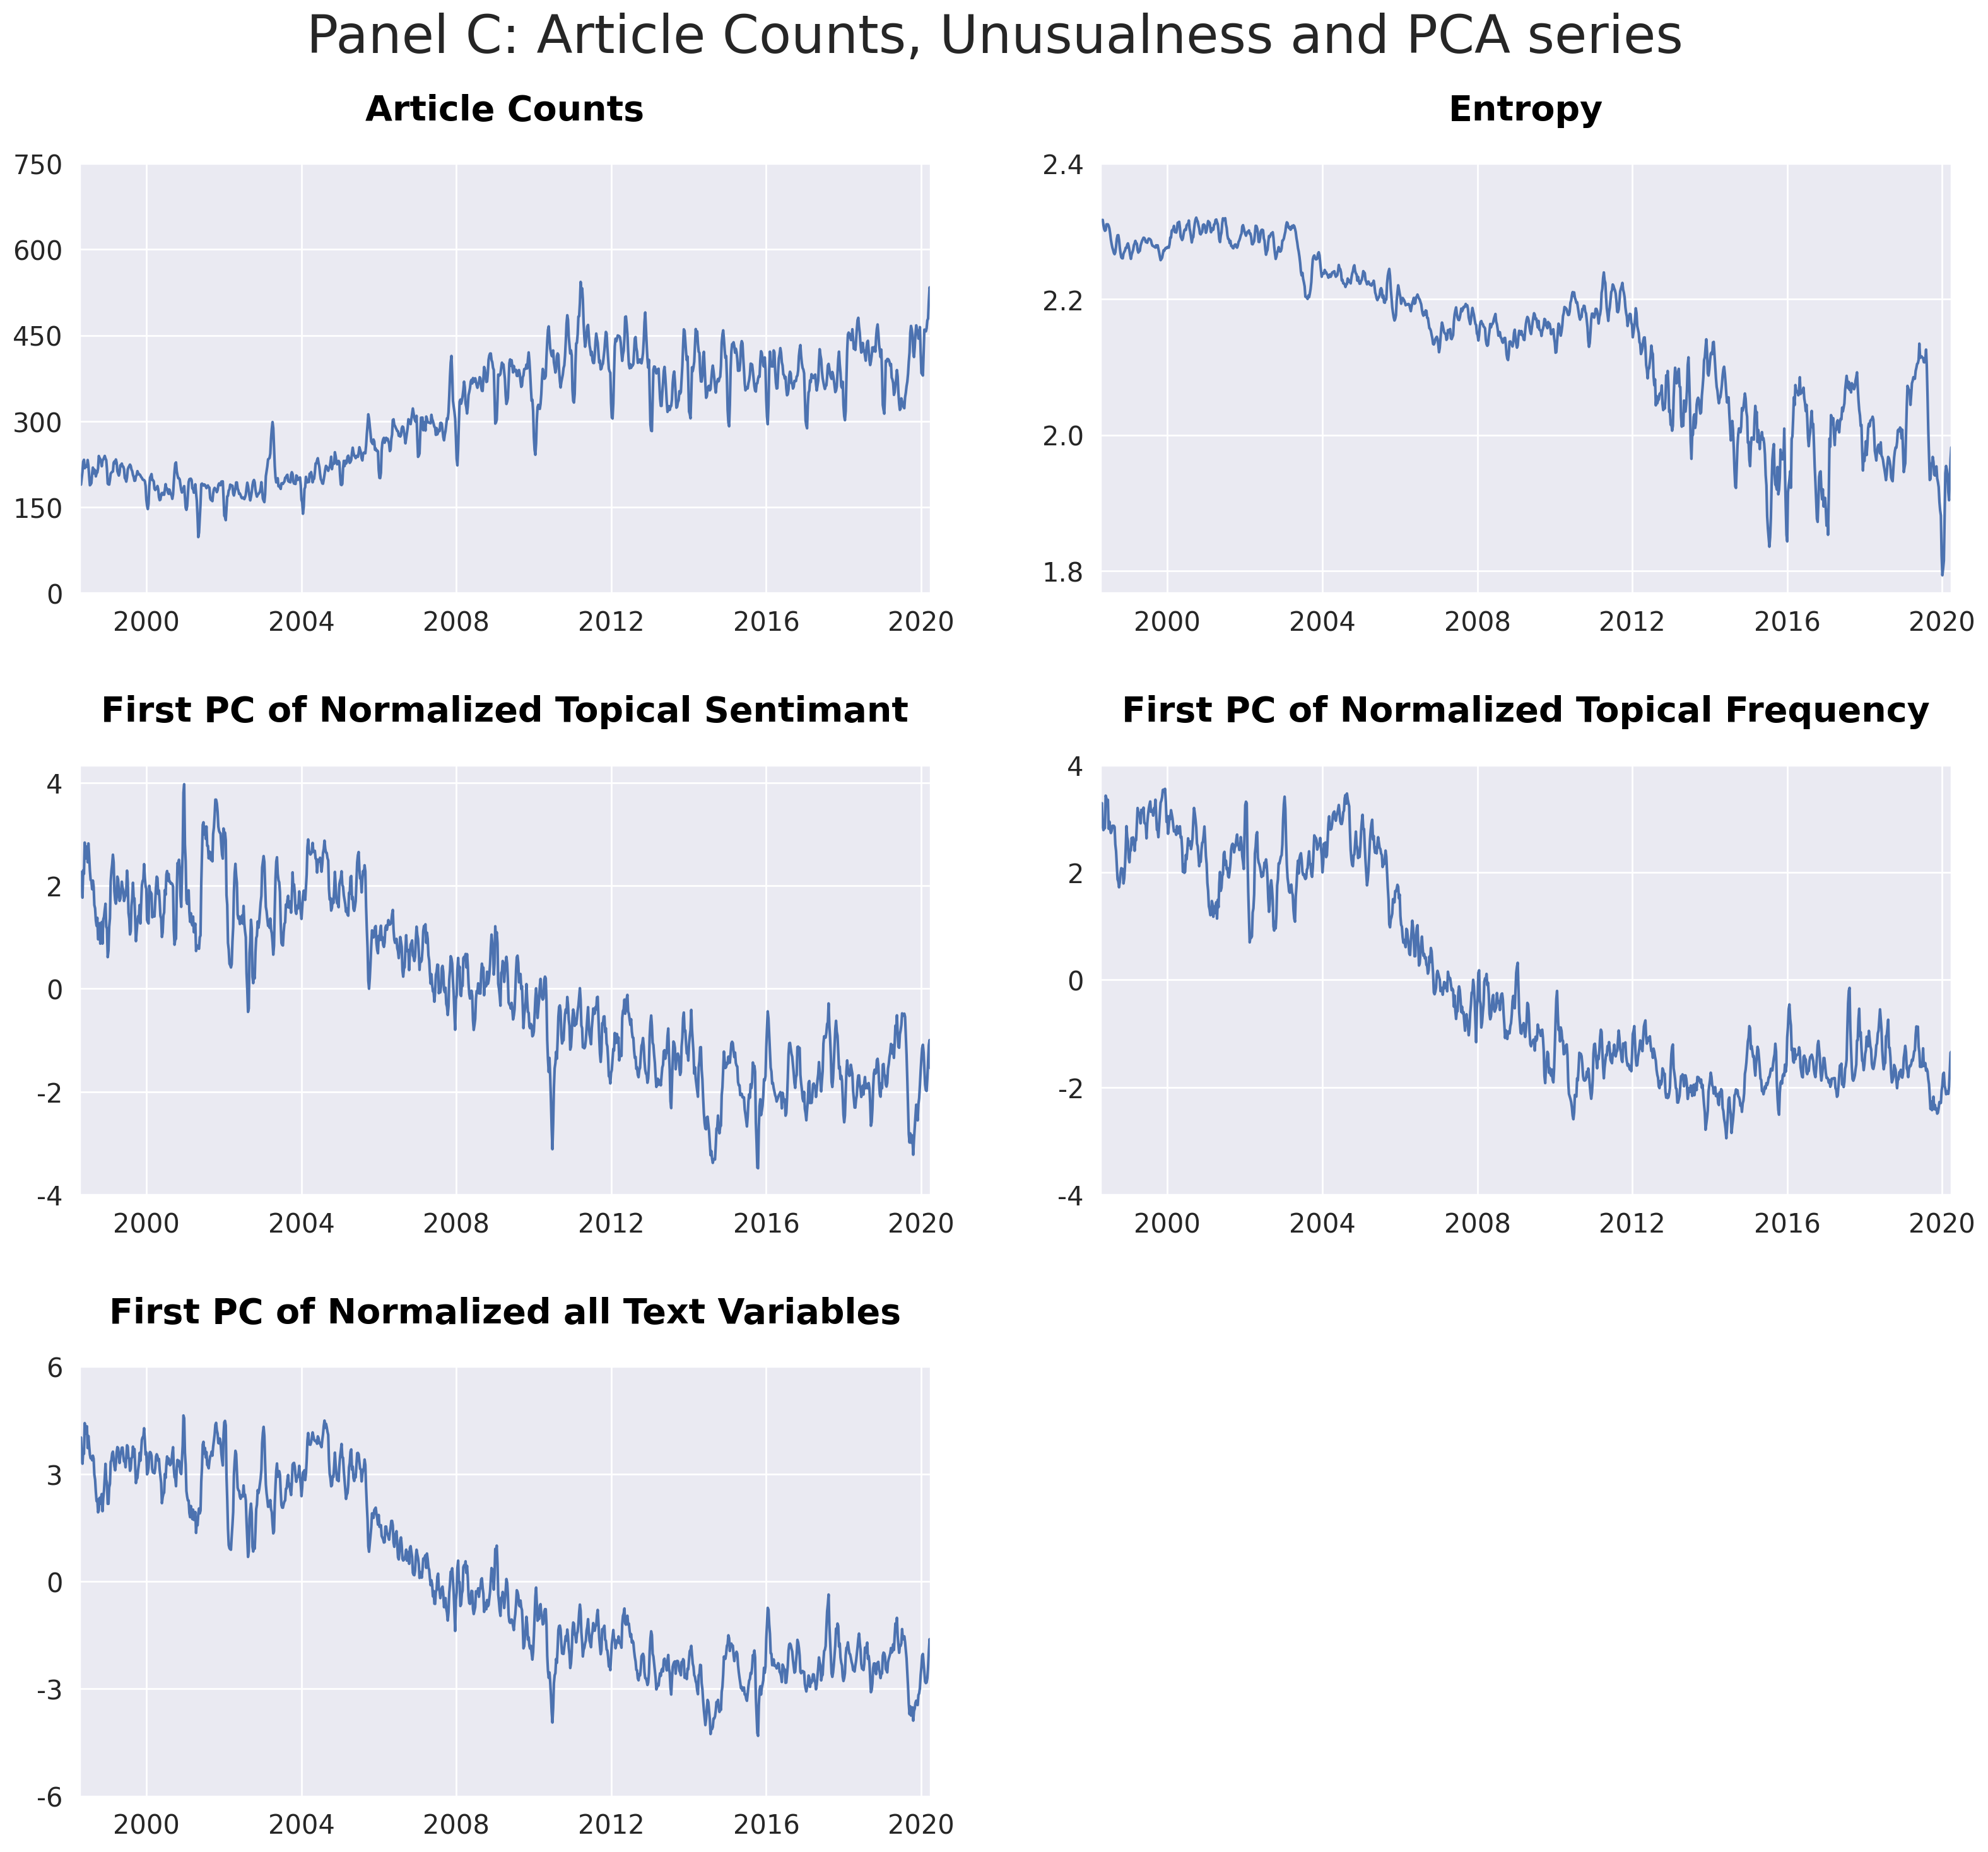

In [3]:
# read the latest dataset
dataset = pd.read_stata('transformed_data_prices_v19.2_acc.dta')
date_cols_price = [x for x in list(dataset.columns.values) if 'date' in x]
dataset = dataset.rename(columns={x:'_'.join(x.split('_')[:-1]) for x in set(dataset.columns.values) if x not in date_cols_price})

# remedy missing var in in-sample analysis
dataset = dataset.rename(columns={'date_Fri':'date'})
# remedy missing var in in-sample analysis
dataset['sent'] = dataset['sCo']+dataset['sGom']+dataset['sEnv']\
                 +dataset['sEpg']+dataset['sBbl']+dataset['sRpc']+dataset['sEp']

plot_freq(dataset)
plot_sent(dataset)
plot_others(dataset)